# Shaat Dikes paleomagnetic data analysis

## Import Python libraries

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Calculate present local field direction

In [2]:
Shaat_location_lat = 17.1 # N
Shaat_location_lon = 54.9 # E

Mirbat_plf_dec, Mirbat_plf_inc, _ = ipmag.igrf([2023, 0, Shaat_location_lat, Shaat_location_lon])
print('The present day geomagnetic field in the study location is:')
print('dec: ' + str(round(Mirbat_plf_dec,1)))
print('inc: ' + str(round(Mirbat_plf_inc,1)))

Mirbat_dipole_dec = 0
Mirbat_dipole_inc = ipmag.inc_from_lat(Shaat_location_lat)
print('')
print('The dipole field direction in the study location is:')
print('dec: ' + str(round(Mirbat_dipole_dec,1)))
print('inc: ' + str(round(Mirbat_dipole_inc,1)))

The present day geomagnetic field in the study location is:
dec: 0.9
inc: 23.9

The dipole field direction in the study location is:
dec: 0
inc: 31.6


## Load MagIC data tables and site table with more precise locations

Note that only the dikes in the Leger panel have a tilt-correction that we are confident about. 

In [3]:
SD_site_data = pd.read_csv('../data/pmag/sites.txt', sep='\t', header=1)
SD_specimen_data = pd.read_csv('../data/pmag/specimens.txt', sep='\t', header=1)

# get more precise site locations
SD_site_info = pd.read_csv('../data/field_data/site_locations.csv', sep=',', header=0, index_col='site')
SD_site_locations = pd.read_csv('../data/field_data/site_locations.csv', sep=',', header=0, index_col='site')[['latitude', 'longitude']]
# map site locations to site data
SD_site_data['lat'] = SD_site_locations['latitude'][SD_site_data['site']].tolist()
SD_site_data['lon'] = SD_site_locations['longitude'][SD_site_data['site']].tolist()

SD_site_data_gc = SD_site_data[SD_site_data['dir_tilt_correction'] == 0]
SD_site_data_tc = SD_site_data[SD_site_data['dir_tilt_correction'] == 100]
SD_specimen_data_gc = SD_specimen_data[SD_specimen_data['dir_tilt_correction'] == 0]
SD_specimen_data_tc = SD_specimen_data[SD_specimen_data['dir_tilt_correction'] == 100]

In [4]:
SD_site_info.head()

,latitude,longitude,thickness,geologic_classes,geologic_types,lithologies,lithology,age_low,age_high,age_unit,orientation,locale,comment
site,,,,,,,,,,,,,
SD1,17.0513,54.8528,3.3,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD2,17.0520,54.8509,2.7,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD3,17.0517,54.8503,3.3,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD4,17.0519,54.8565,1.6,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD5,17.0528,54.8583,3.6,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN


In [5]:
SD_site_data

,site,location,samples,specimens,age_high,age_low,age_unit,dir_alpha95,dir_comp_name,dir_dec,dir_inc,dir_k,dir_n_samples,dir_n_specimens,dir_n_specimens_lines,dir_n_specimens_planes,dir_polarity,dir_r,dir_tilt_correction,lat,lon,geologic_classes,geologic_types,lithologies,analysts,software_packages,citations,method_codes,result_quality,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,AynC,Zalawt plain,AynC-1:AynC-11:AynC-12:AynC-13:AynC-14:AynC-15...,AynC-1:AynC-11:AynC-12:AynC-13:AynC-14:AynC-15...,717,660,Ma,6.4,lt,8.0,27.3,34.0,16.0,16.0,16.0,0.0,n,15.5562,0.0,17.0928,54.7669,Sedimentary,Conglomerate,Diamictite,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM:FS-LOC...,g,7.0,3.8,81.9,162.6
1,AynC,Zalawt plain,AynC-1:AynC-10:AynC-11:AynC-12:AynC-13:AynC-14...,AynC-1:AynC-10:AynC-11:AynC-12:AynC-13:AynC-14...,717,660,Ma,71.8,mag,315.5,41.3,1.0,16.0,16.0,16.0,0.0,n,3.8924,0.0,17.0928,54.7669,Sedimentary,Conglomerate,Diamictite,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO:DE-BFL:LP-DC4:DE-...,g,87.5,53.3,47.9,341.6
2,AynC,Zalawt plain,AynC-10:AynC-15:AynC-16:AynC-17:AynC-2:AynC-3:...,AynC-10:AynC-15:AynC-16:AynC-17:AynC-2:AynC-3:...,717,660,Ma,39.3,mt,64.1,46.7,3.0,9.0,9.0,9.0,0.0,t,6.0077,0.0,17.0928,54.7669,Sedimentary,Conglomerate,Diamictite,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM:FS-LOC...,g,50.6,32.6,30.4,122.1
3,S100,Zalawt plain,S100-2:S100-3,S100-2:S100-3,735,726,Ma,20.0,lt,356.4,26.9,158.0,2.0,2.0,2.0,0.0,n,1.9937,0.0,17.1351,54.9550,Igneous,Volcanic Dike,Felsic Dike,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:FS-LOC-GPS,g,21.7,11.8,85.5,285.8
4,S100,Zalawt plain,S100-2:S100-3,S100-2:S100-3,735,726,Ma,20.0,lt,355.2,21.5,158.0,2.0,2.0,2.0,0.0,n,1.9937,100.0,17.1351,54.9550,Igneous,Volcanic Dike,Felsic Dike,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DA-DIR-GEO:...,g,21.1,11.1,82.4,273.5
5,S101,Zalawt plain,S101-1:S101-2:S101-3,S101-1:S101-2:S101-3,735,726,Ma,10.7,mag,277.2,-61.3,134.0,3.0,3.0,3.0,0.0,t,2.9851,0.0,17.1110,54.9426,Igneous,Volcanic Dike,Mafic Dike,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM:FS-LOC...,g,16.5,12.6,-6.3,282.4
6,S101,Zalawt plain,S101-1:S101-2:S101-3,S101-1:S101-2:S101-3,735,726,Ma,10.7,mag,267.1,-64.6,135.0,3.0,3.0,3.0,0.0,t,2.9851,100.0,17.1110,54.9426,Igneous,Volcanic Dike,Mafic Dike,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,17.2,13.8,-14.3,280.1
7,S103,Zalawt plain,S103-1:S103-2:S103-3,S103-1:S103-2:S103-3,735,726,Ma,3.5,mag,273.9,-72.8,1250.0,3.0,3.0,3.0,0.0,t,2.9984,100.0,17.1049,54.9430,Igneous,Volcanic Dike,Mafic Dike,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT:LP-DC4:DE-FM:DA-DI...,g,6.2,5.5,-12.5,267.4
8,S103,Zalawt plain,S103-1:S103-2:S103-3,S103-1:S103-2:S103-3,735,726,Ma,3.5,mag,287.1,-68.7,1232.0,3.0,3.0,3.0,0.0,t,2.9984,0.0,17.1049,54.9430,Igneous,Volcanic Dike,Mafic Dike,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:DE-FM:FS-LOC...,g,5.9,5.0,-3.4,271.0
9,S104,Zalawt plain,S104-5:S104-6,S104-5:S104-6,735,726,Ma,5.7,lt,353.1,37.4,1906.0,2.0,2.0,2.0,0.0,n,1.9995,0.0,17.1219,54.9242,Igneous,Volcanic Dike,Mafic Dike,NaN,pmagpy-4.2.124: demag_gui.v.3.0,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO:LP-DC4:FS-LOC-GPS,g,6.7,3.9,82.4,356.3


## Low-temperature component

- Typically the low temperature component is removed largely by the low-temperature (77 K) demagnetization step and is typically fully removed by thermal demagnetization to 250ºC although it can persist to higher temperatures. 
- The directions correspond to the present-day field and present-day expected dipole direction.
- This demagnetization behavior and direction is consistent with the low-temperature component being a recently acquired viscous remanent magnetization.

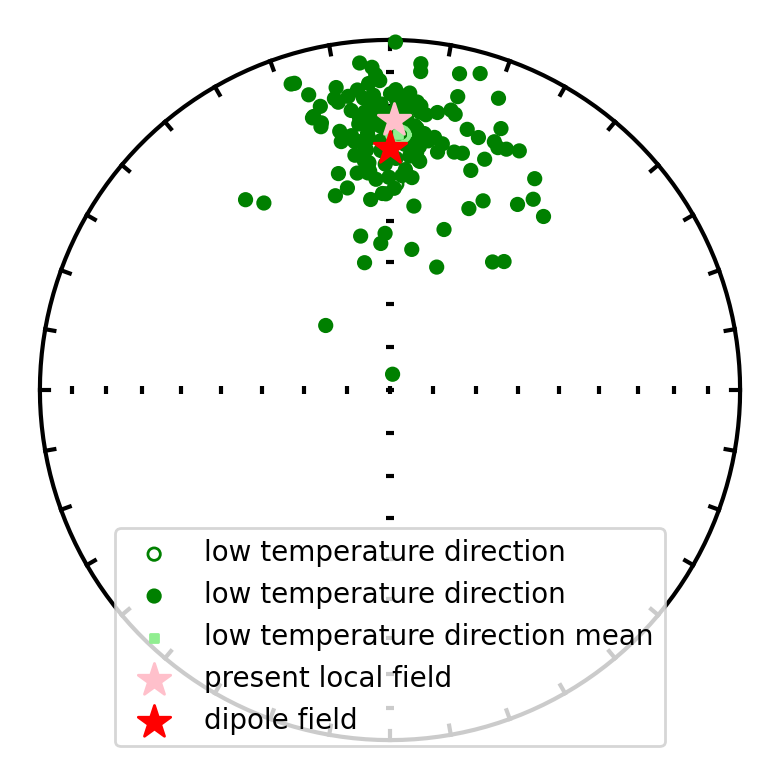

In [6]:
SD_specimen_lt_gc = SD_specimen_data_gc[SD_specimen_data_gc['dir_comp'] == 'lt'].reset_index(drop=True)
SD_specimen_lt_gc_mean = ipmag.fisher_mean(SD_specimen_lt_gc['dir_dec'], SD_specimen_lt_gc['dir_inc'])

plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(SD_specimen_lt_gc['dir_dec'], SD_specimen_lt_gc['dir_inc'], color='green', marker='o', label='low temperature direction')
ipmag.plot_di_mean(SD_specimen_lt_gc_mean['dec'], SD_specimen_lt_gc_mean['inc'], SD_specimen_lt_gc_mean['alpha95'], 
                   color='lightgreen', marker='s', markersize = 10, label='low temperature direction mean')
ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='present local field')
ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='dipole field')
plt.legend(loc='lower center')
plt.show()

## Shaat dikes magnetite component

We are confident about tilt corrections for the Leger dikes panel and will therefore focus on the data from the panel. The fits named 'mag' within the MagIC files were fit to the characteristic unblocking temperatures of low-titanium titanomagnetite.

The main set of dikes are those in a NNW-SSE orientation. They cross-cut dikes in a E-W orientation. We will split the dikes into these two populations so they can be plotted accordingly.

In [7]:
SD_sites_Leger_NNW = SD_site_info[(SD_site_info['locale'] == 'Leger') & (SD_site_info['orientation'] == 'NNW-SSE')]
SD_sites_Leger_NNW_gc = SD_site_data_gc[SD_site_data_gc['site'].isin(SD_sites_Leger_NNW.index)].reset_index(drop=True)
SD_sites_Leger_NNW_tc = SD_site_data_tc[SD_site_data_tc['site'].isin(SD_sites_Leger_NNW.index)].reset_index(drop=True)
SD_sites_Leger_NNW_mag_gc = SD_sites_Leger_NNW_gc[SD_sites_Leger_NNW_gc['dir_comp_name'] == 'mag'].reset_index(drop=True)
SD_sites_Leger_NNW_mag_tc = SD_sites_Leger_NNW_tc[SD_sites_Leger_NNW_tc['dir_comp_name'] == 'mag'].reset_index(drop=True)

In [8]:
SD_sites_Leger_E = SD_site_info[(SD_site_info['locale'] == 'Leger') & (SD_site_info['orientation'] == 'E-W')]
SD_sites_Leger_E_gc = SD_site_data_gc[SD_site_data_gc['site'].isin(SD_sites_Leger_E.index)].reset_index(drop=True)
SD_sites_Leger_E_tc = SD_site_data_tc[SD_site_data_tc['site'].isin(SD_sites_Leger_E.index)].reset_index(drop=True)
SD_sites_Leger_E_mag_gc = SD_sites_Leger_E_gc[SD_sites_Leger_E_gc['dir_comp_name'] == 'mag'].reset_index(drop=True)
SD_sites_Leger_E_mag_tc = SD_sites_Leger_E_tc[SD_sites_Leger_E_tc['dir_comp_name'] == 'mag'].reset_index(drop=True)

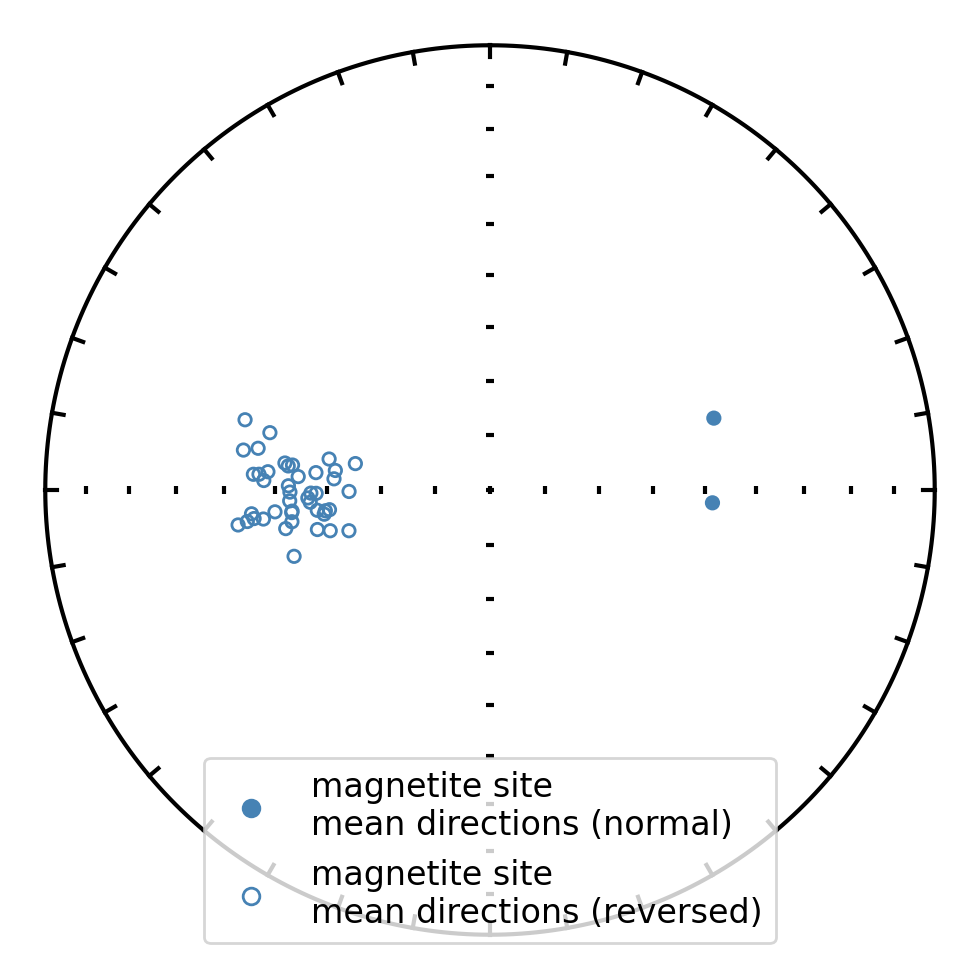

mean of geographic coordinates NNW-SSE magnetite site directions:

Dec: 88.8  Inc: 53.2
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 2.1
Precision parameter (k) estimate: 100.1

paleolatitude calculated from mean inclination: 33.8


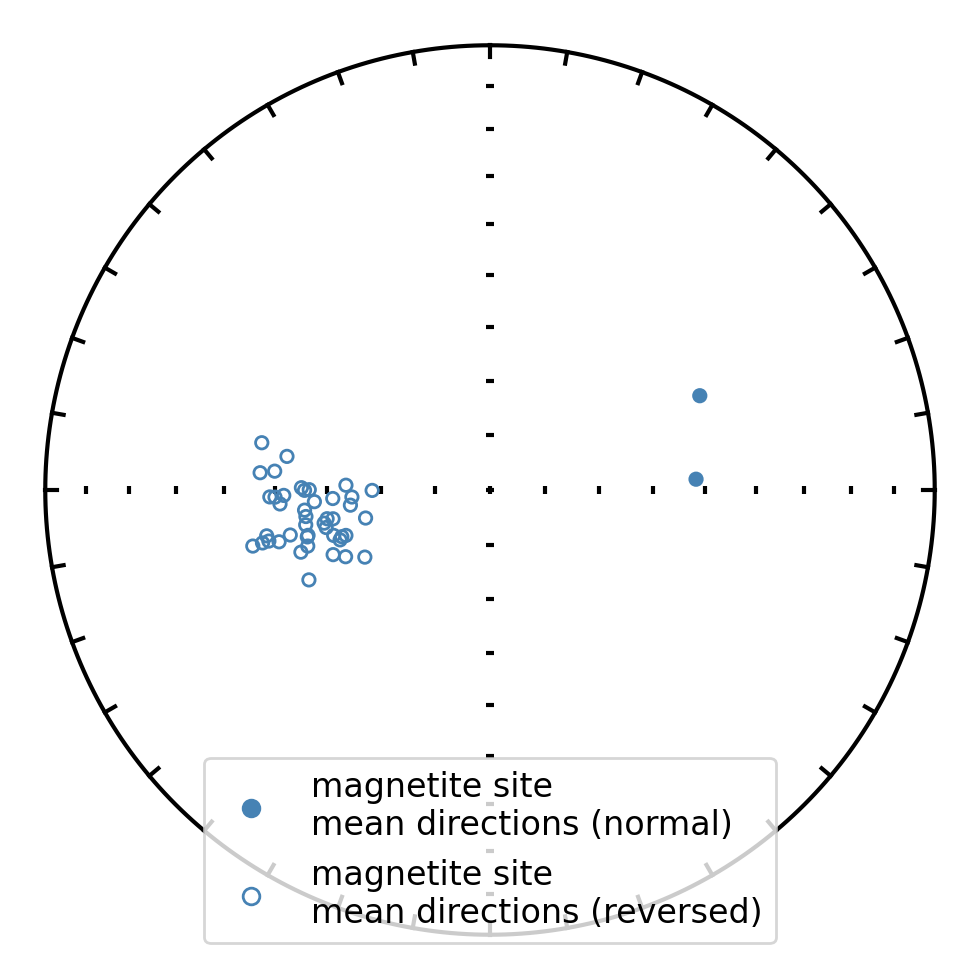

mean of geographic coordinates NNW-SSE magnetite site directions:

Dec: 81.0  Inc: 55.9
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 2.1
Precision parameter (k) estimate: 100.2

paleolatitude calculated from mean inclination: 36.4


In [9]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_gc['dir_dec'], 
              SD_sites_Leger_NNW_mag_gc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
# Create custom handles for the legend
normal_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='magnetite site\nmean directions (normal)')
reversed_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='magnetite site\nmean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle, reversed_handle], loc='lower center', fontsize=12)
plt.show()

SD_sites_Leger_NNW_mag_gc_diblock = ipmag.make_di_block(SD_sites_Leger_NNW_mag_gc['dir_dec'],
                                                        SD_sites_Leger_NNW_mag_gc['dir_inc'])
SD_sites_Leger_NNW_mag_gc_unified = pmag.flip(SD_sites_Leger_NNW_mag_gc_diblock, combine=True)
SD_sites_Leger_NNW_mag_gc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_NNW_mag_gc_unified)

print('mean of geographic coordinates NNW-SSE magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_NNW_mag_gc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_NNW_mag_gc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_tc['dir_dec'], 
              SD_sites_Leger_NNW_mag_tc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
# Create custom handles for the legend
normal_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='magnetite site\nmean directions (normal)')
reversed_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='magnetite site\nmean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle, reversed_handle], loc='lower center', fontsize=12)

plt.show()

SD_sites_Leger_NNW_mag_tc_diblock = ipmag.make_di_block(SD_sites_Leger_NNW_mag_tc['dir_dec'],
                                                        SD_sites_Leger_NNW_mag_tc['dir_inc'])
SD_sites_Leger_NNW_mag_tc_unified = pmag.flip(SD_sites_Leger_NNW_mag_tc_diblock, combine=True)
SD_sites_Leger_NNW_mag_tc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_NNW_mag_tc_unified)

print('mean of geographic coordinates NNW-SSE magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_NNW_mag_tc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_NNW_mag_tc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

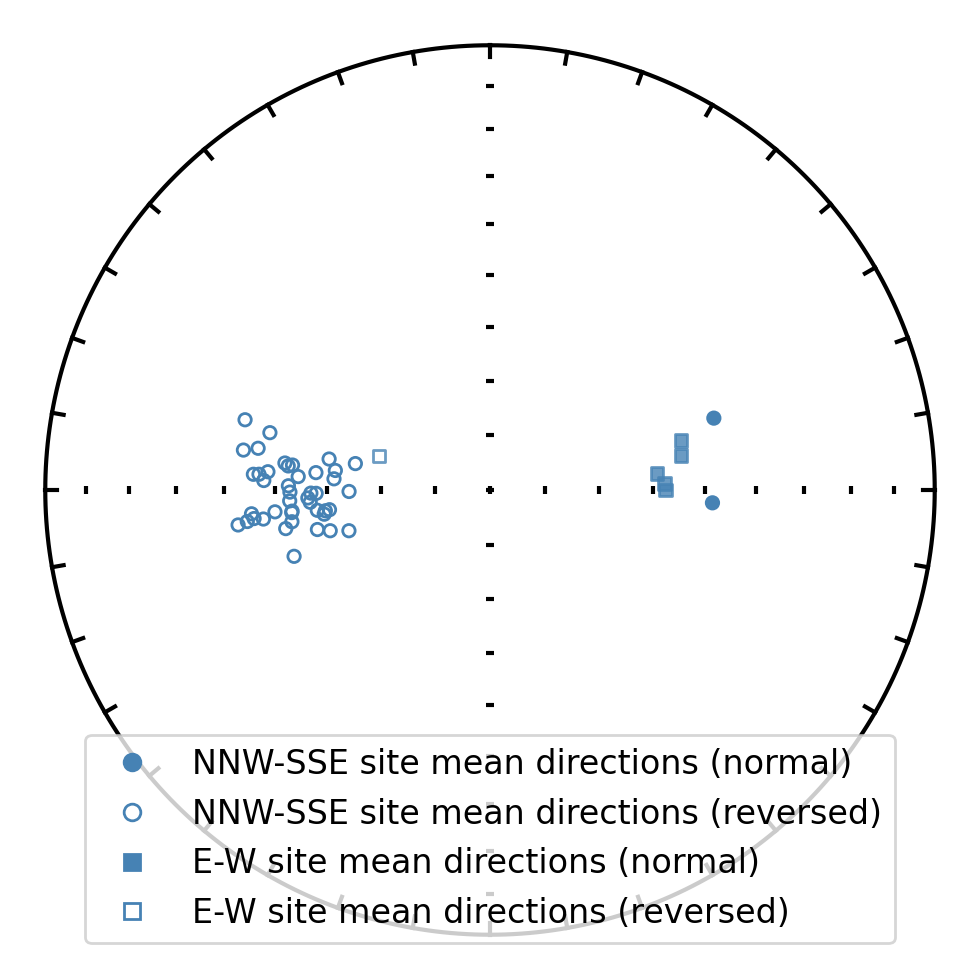

mean of geographic coordinates all magnetite site directions:

Dec: 88.5  Inc: 53.9
Number of directions in mean (n): 51
Angular radius of 95% confidence (a_95): 2.0
Precision parameter (k) estimate: 98.1

paleolatitude calculated from mean inclination: 34.4


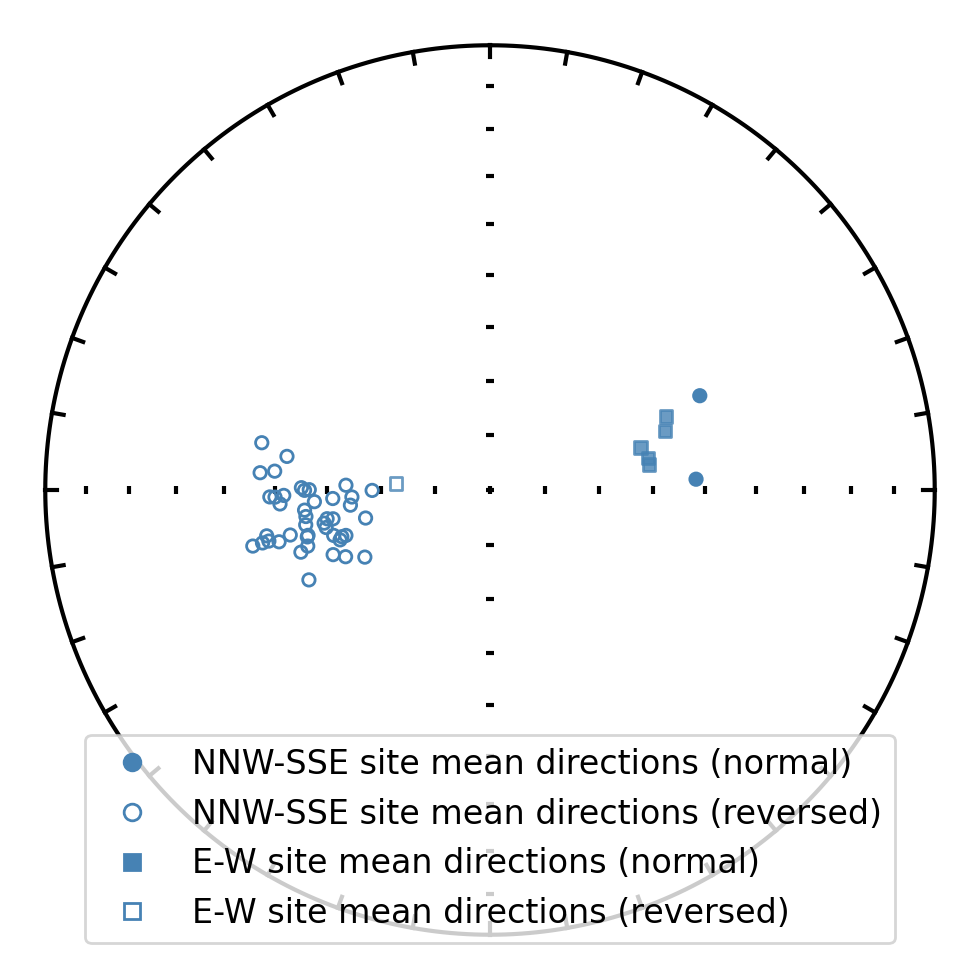

mean of tilt-corrected coordinates all magnetite site directions:

Dec: 80.5  Inc: 56.5
Number of directions in mean (n): 51
Angular radius of 95% confidence (a_95): 2.0
Precision parameter (k) estimate: 98.2

paleolatitude calculated from mean inclination: 37.1


In [10]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_gc['dir_dec'], 
              SD_sites_Leger_NNW_mag_gc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD_sites_Leger_E_mag_gc['dir_dec'], 
              SD_sites_Leger_E_mag_gc['dir_inc'], 
              color='steelblue', marker='s', label='magnetite site\nmean directions',
              markersize=20,alpha=0.8)
# Create custom handles for the legend
normal_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='NNW-SSE site mean directions (normal)')
reversed_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='NNW-SSE site mean directions (reversed)')
normal_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                           linestyle='None', label='E-W site mean directions (normal)')
reversed_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                             linestyle='None', mfc='none', label='E-W site mean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle_NNW, reversed_handle_NNW, normal_handle_E, reversed_handle_E], 
           loc='lower center', fontsize=12)
plt.show()

SD_sites_Leger_all_mag_dec_gc = SD_sites_Leger_NNW_mag_gc['dir_dec'].tolist() + SD_sites_Leger_E_mag_gc['dir_dec'].tolist()
SD_sites_Leger_all_mag_inc_gc = SD_sites_Leger_NNW_mag_gc['dir_inc'].tolist() + SD_sites_Leger_E_mag_gc['dir_inc'].tolist()

SD_sites_Leger_all_mag_gc_diblock = ipmag.make_di_block(SD_sites_Leger_all_mag_dec_gc, SD_sites_Leger_all_mag_inc_gc)
SD_sites_Leger_all_mag_gc_unified = pmag.flip(SD_sites_Leger_all_mag_gc_diblock, combine=True)
SD_sites_Leger_all_mag_gc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_all_mag_gc_unified)

print('mean of geographic coordinates all magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_all_mag_gc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_all_mag_gc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_tc['dir_dec'], 
              SD_sites_Leger_NNW_mag_tc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD_sites_Leger_E_mag_tc['dir_dec'], 
              SD_sites_Leger_E_mag_tc['dir_inc'], 
              color='steelblue', marker='s', label='magnetite site\nmean directions',
              markersize=20,alpha=0.8)
# Create custom handles for the legend
normal_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='NNW-SSE site mean directions (normal)')
reversed_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='NNW-SSE site mean directions (reversed)')
normal_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                           linestyle='None', label='E-W site mean directions (normal)')
reversed_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                             linestyle='None', mfc='none', label='E-W site mean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle_NNW, reversed_handle_NNW, normal_handle_E, reversed_handle_E], 
           loc='lower center', fontsize=12)
plt.savefig('./output/SD_site_data_Leger_mag_tc.pdf')
plt.show()

SD_sites_Leger_all_mag_dec_tc = SD_sites_Leger_NNW_mag_tc['dir_dec'].tolist() + SD_sites_Leger_E_mag_tc['dir_dec'].tolist()
SD_sites_Leger_all_mag_inc_tc = SD_sites_Leger_NNW_mag_tc['dir_inc'].tolist() + SD_sites_Leger_E_mag_tc['dir_inc'].tolist()

SD_sites_Leger_all_mag_tc_diblock = ipmag.make_di_block(SD_sites_Leger_all_mag_dec_tc, SD_sites_Leger_all_mag_inc_tc)
SD_sites_Leger_all_mag_tc_unified = pmag.flip(SD_sites_Leger_all_mag_tc_diblock, combine=True)
SD_sites_Leger_all_mag_tc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_all_mag_tc_unified)

print('mean of tilt-corrected coordinates all magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_all_mag_tc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_all_mag_tc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

### Plot with dated dikes

SD50 is a dated felsic dike that has a magnetite component sitting within the main population of reversed mafic dike directions
SD51 is a mafic dike collected in baked zone of Leger granite

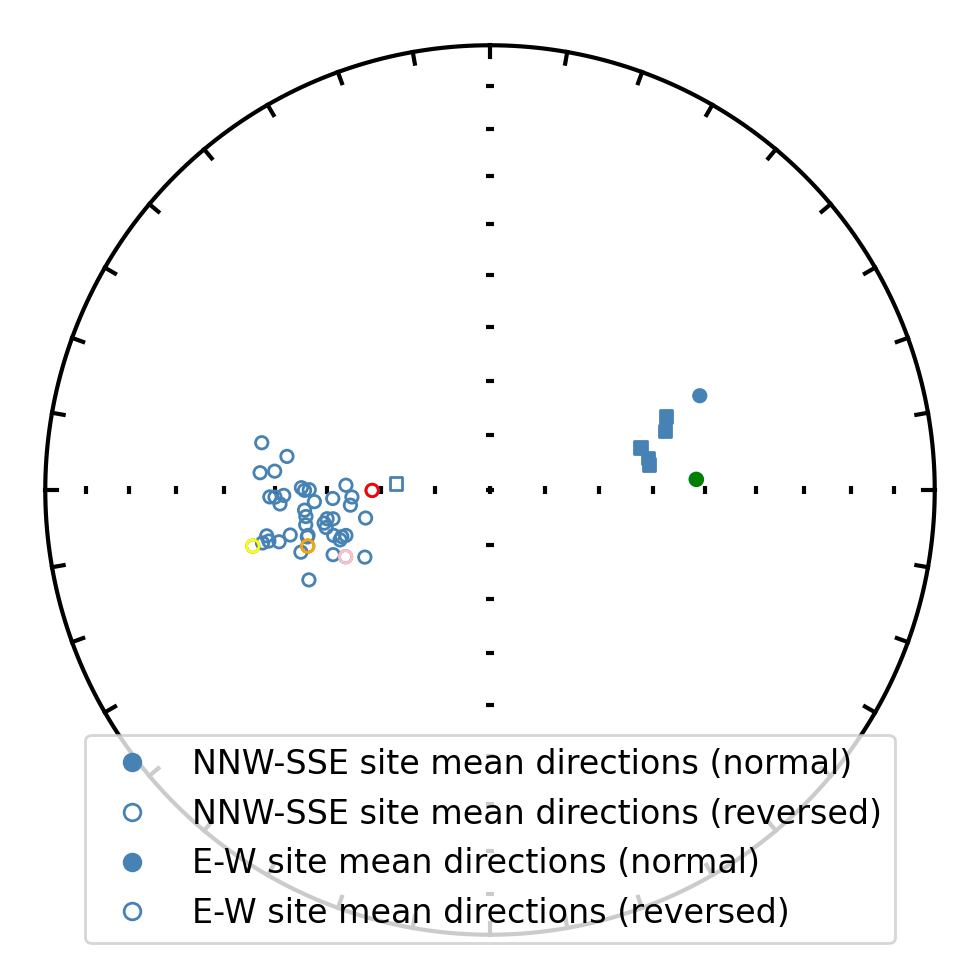

In [11]:
SD37_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD37'].reset_index(drop=True)
SD39_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD39'].reset_index(drop=True)
SD50_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD50'].reset_index(drop=True)
SD51_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD51'].reset_index(drop=True)
SD95_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD95'].reset_index(drop=True)

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_tc['dir_dec'], 
              SD_sites_Leger_NNW_mag_tc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD_sites_Leger_E_mag_tc['dir_dec'], 
              SD_sites_Leger_E_mag_tc['dir_inc'], 
              color='steelblue', marker='s', label='magnetite site\nmean directions',
              markersize=20)

ipmag.plot_di(SD37_site_data_mag['dir_dec'], 
              SD37_site_data_mag['dir_inc'], 
              color='green', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD39_site_data_mag['dir_dec'], 
              SD39_site_data_mag['dir_inc'], 
              color='yellow', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD50_site_data_mag['dir_dec'], 
              SD50_site_data_mag['dir_inc'], 
              color='red', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD51_site_data_mag['dir_dec'], 
              SD51_site_data_mag['dir_inc'], 
              color='orange', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD95_site_data_mag['dir_dec'], 
              SD95_site_data_mag['dir_inc'], 
              color='pink', marker='o', label='magnetite site\nmean directions',
              markersize=20)

normal_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='NNW-SSE site mean directions (normal)')
reversed_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='NNW-SSE site mean directions (reversed)')
normal_handle_E = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='E-W site mean directions (normal)')
reversed_handle_E = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='E-W site mean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle_NNW, reversed_handle_NNW, normal_handle_E, reversed_handle_E], 
           loc='lower center', fontsize=12)

plt.savefig('./output/SD_site_data_Leger_mag_geochron.pdf', dpi=300)
plt.show()

### Reversal tests

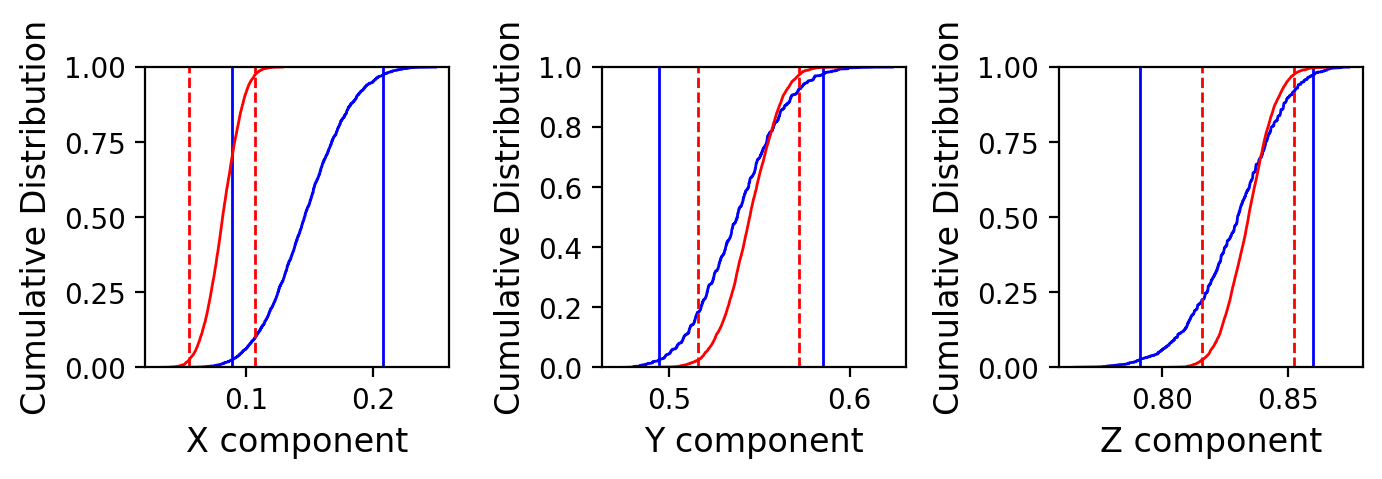

Pass


1

In [12]:
ipmag.reversal_test_bootstrap(dec=SD_sites_Leger_all_mag_dec_tc, 
                              inc=SD_sites_Leger_all_mag_inc_tc)

In [13]:
ipmag.reversal_test_MM1990(dec=SD_sites_Leger_all_mag_dec_tc, 
                           inc=SD_sites_Leger_all_mag_inc_tc)

Results of Watson V test: 

Watson's V:           3.4
Critical value of V:  7.4
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.7
Critical angle for M&M1990:   5.5
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.7442406779175474, 5.548438497850413, 'B')

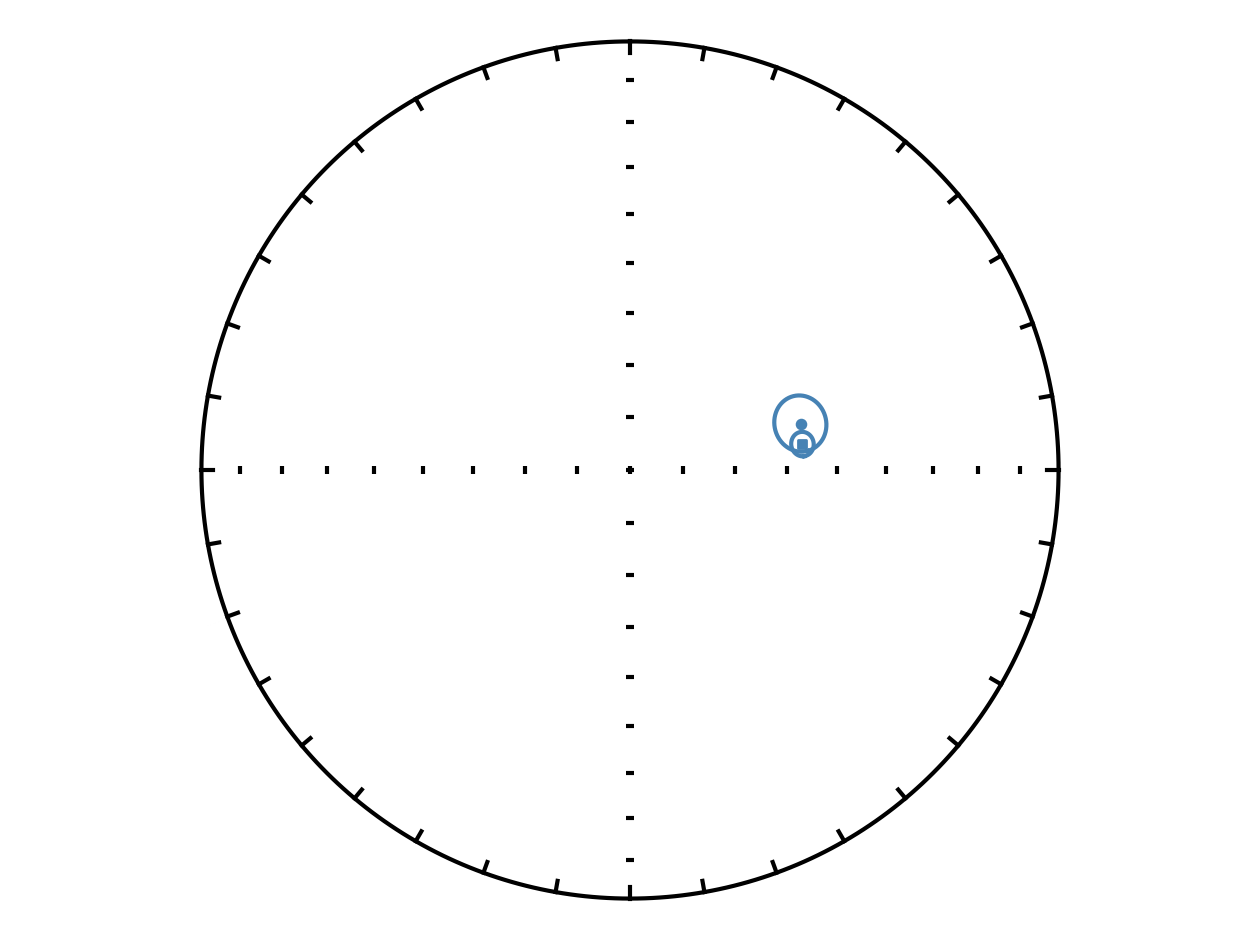

In [14]:
combined_di_block = ipmag.make_di_block(SD_sites_Leger_all_mag_dec_tc, SD_sites_Leger_all_mag_inc_tc)

normal, reversed = pmag.flip(combined_di_block)

N_mean = ipmag.fisher_mean(di_block=normal)
R_mean = ipmag.fisher_mean(di_block=reversed)

ipmag.plot_net()
ipmag.plot_di_mean(N_mean['dec'], N_mean['inc'], N_mean['alpha95'], color='steelblue', marker='o', markersize=10)
ipmag.plot_di_mean(R_mean['dec'], R_mean['inc'], R_mean['alpha95'], color='steelblue', marker='s', markersize=10)

In [15]:
ipmag.common_mean_bayes(normal, reversed)

Common mean: strong support


(26.50798352757919, 0.9636469173032108, 'Common mean: strong support')

### Paleomagnetic pole calculation

In [16]:
SD_sites_Leger_NNW_vgp_lon = []
SD_sites_Leger_NNW_vgp_lat = []
SD_sites_Leger_E_vgp_lon = []
SD_sites_Leger_E_vgp_lat = []

for i in range(len(SD_sites_Leger_NNW_mag_tc)):
    vgp_lon_i, vgp_lat_i, dp, dm = pmag.dia_vgp(SD_sites_Leger_NNW_mag_tc['dir_dec'][i], 
                                                SD_sites_Leger_NNW_mag_tc['dir_inc'][i], 
                                                1,
                                                SD_sites_Leger_NNW_mag_tc['lat'][i], 
                                                SD_sites_Leger_NNW_mag_tc['lon'][i])
    if vgp_lon_i > 180:
        vgp_lon_i = vgp_lon_i-180
        vgp_lat_i = -vgp_lat_i
        
    SD_sites_Leger_NNW_vgp_lon.append(vgp_lon_i)
    SD_sites_Leger_NNW_vgp_lat.append(vgp_lat_i)
    
for i in range(len(SD_sites_Leger_E_mag_tc)):
    vgp_lon_i, vgp_lat_i, dp, dm = pmag.dia_vgp(SD_sites_Leger_E_mag_tc['dir_dec'][i], 
                                                SD_sites_Leger_E_mag_tc['dir_inc'][i], 
                                                1,
                                                SD_sites_Leger_E_mag_tc['lat'][i], 
                                                SD_sites_Leger_E_mag_tc['lon'][i])
    if vgp_lon_i > 180:
        vgp_lon_i = vgp_lon_i-180
        vgp_lat_i = -vgp_lat_i
        
    SD_sites_Leger_E_vgp_lon.append(vgp_lon_i)
    SD_sites_Leger_E_vgp_lat.append(vgp_lat_i)
    
mean_Shaat_pole_NNW = ipmag.fisher_mean(SD_sites_Leger_NNW_vgp_lon, SD_sites_Leger_NNW_vgp_lat)
print('mean pole of NNW-SSE magnetite site VGPs:')
ipmag.print_pole_mean(mean_Shaat_pole_NNW)
print('')
Shaat_NNW_pole_colat = pmag.angle([mean_Shaat_pole_NNW['dec'], mean_Shaat_pole_NNW['inc']], [Shaat_location_lon, Shaat_location_lat])
Shaat_NNW_pole_paleolat = 90 - Shaat_NNW_pole_colat[0]
print('paleolatitude of NNW-SSE magnetite pole:')
print(round(Shaat_NNW_pole_paleolat,1))
print('')
print('')

combined_vgp_lon = SD_sites_Leger_NNW_vgp_lon + SD_sites_Leger_E_vgp_lon
combined_vgp_lat = SD_sites_Leger_NNW_vgp_lat + SD_sites_Leger_E_vgp_lat

mean_Shaat_pole_all = ipmag.fisher_mean(combined_vgp_lon, combined_vgp_lat)
print('mean pole of all magnetite site VGPs:')
ipmag.print_pole_mean(mean_Shaat_pole_all)
print('')
Shaat_all_pole_colat = pmag.angle([mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc']], [Shaat_location_lon, Shaat_location_lat])
Shaat_all_pole_paleolat = 90 - Shaat_all_pole_colat[0]
print('paleolatitude of all magnetite pole:')
print(round(Shaat_all_pole_paleolat,1))

mean pole of NNW-SSE magnetite site VGPs:
Plon: 110.8  Plat: 17.3
Number of directions in mean (n): 45
Angular radius of 95% confidence (A_95): 2.6
Precision parameter (k) estimate: 67.6

paleolatitude of NNW-SSE magnetite pole:
36.8


mean pole of all magnetite site VGPs:
Plon: 110.1  Plat: 17.8
Number of directions in mean (n): 51
Angular radius of 95% confidence (A_95): 2.5
Precision parameter (k) estimate: 65.1

paleolatitude of all magnetite pole:
37.5


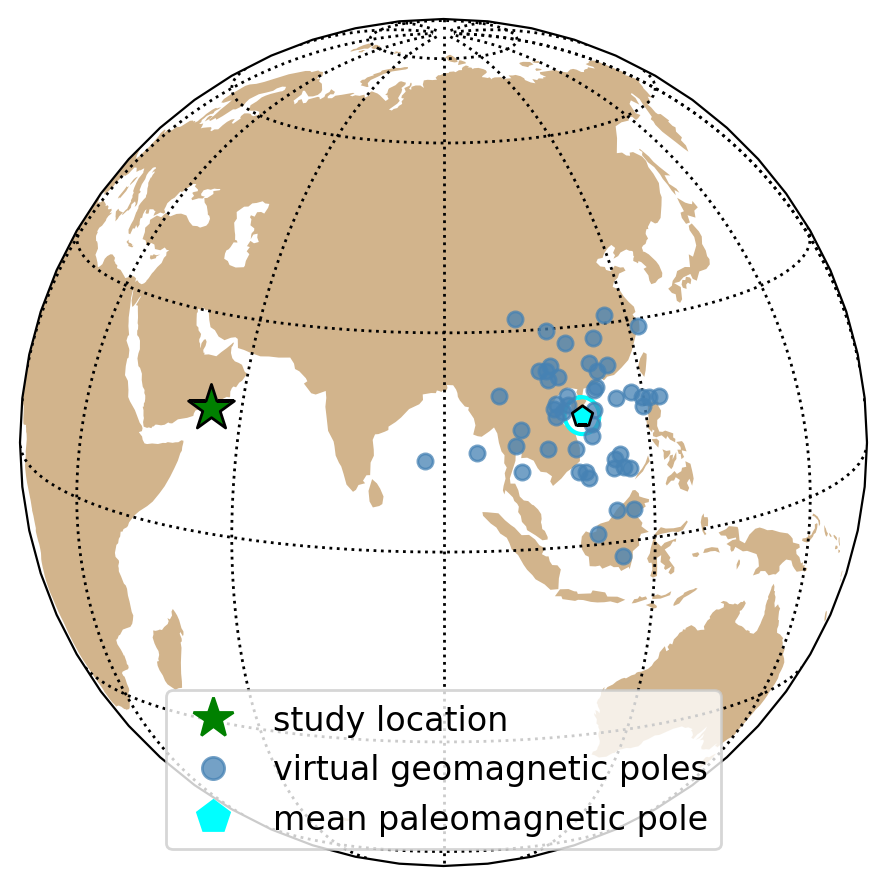

In [17]:
Mirbat_area_lon = 54.9426
Mirbat_area_lat = 17.1110

map_axis = ipmag.make_orthographic_map(central_longitude=90,central_latitude=15,
                                       figsize=(5.5,5.5),land_edge_color=None)
ipmag.plot_vgp(map_axis,vgp_lon=SD_sites_Leger_NNW_vgp_lon,
               vgp_lat=SD_sites_Leger_NNW_vgp_lat,color='steelblue',
               markersize=30,zorder=20,edge=None,alpha=0.75)
ipmag.plot_vgp(map_axis,vgp_lon=SD_sites_Leger_E_vgp_lon,
               vgp_lat=SD_sites_Leger_E_vgp_lat,color='steelblue',
               markersize=30,zorder=20,edge=None,alpha=0.75)
ipmag.plot_pole(map_axis, mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc'], mean_Shaat_pole_all['alpha95'], 
                marker='p',color='aqua', markersize=60)
ipmag.plot_vgp(map_axis,vgp_lon=Mirbat_area_lon,vgp_lat=Mirbat_area_lat,color='green',
               marker='*',markersize=300,zorder=20)
# Create custom legend elements
study_loc = mlines.Line2D([], [], color='green', marker='*', linestyle='None', markersize=15, label='study location')
vgps = mlines.Line2D([], [], color='steelblue', marker='o', linestyle='None', markersize=8, alpha=0.75, label='virtual geomagnetic poles')
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='mean paleomagnetic pole')

# Add the legend to the plot
plt.legend(handles=[study_loc, vgps, mean_pole], loc='lower center', fontsize=12)

plt.savefig('./output/SD_site_data_Leger_mag_pole.pdf', dpi=300)

{'Mode': 'Mode 1',
 'Dec': 110.12329842886388,
 'Inc': 17.808895436468056,
 'N': 51,
 'Mu': 0.988723925777768,
 'Mu_critical': 1.207,
 'Me': 0.6816484620200829,
 'Me_critical': 1.094,
 'Test_result': 'Consistent with Fisher distribution'}

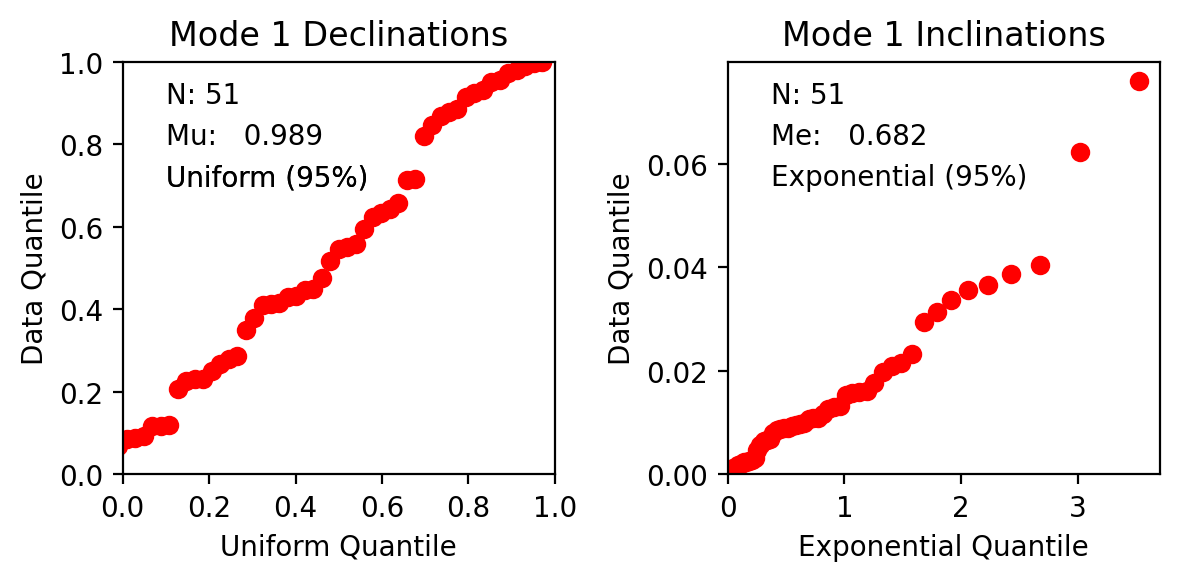

In [18]:
ipmag.fishqq(lon=combined_vgp_lon, lat=combined_vgp_lat)

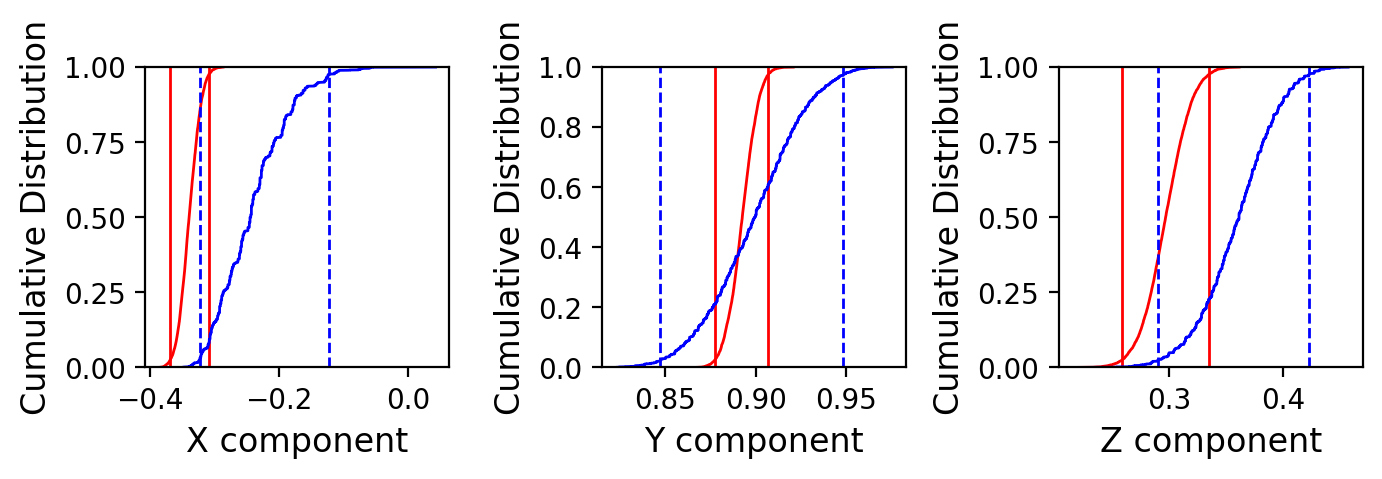

Pass


1

In [19]:
NNW_vgps = ipmag.make_di_block(SD_sites_Leger_NNW_vgp_lon, SD_sites_Leger_NNW_vgp_lat, unit_vector=False)
E_vgps = ipmag.make_di_block(SD_sites_Leger_E_vgp_lon, SD_sites_Leger_E_vgp_lat, unit_vector=False)
ipmag.common_mean_bootstrap(NNW_vgps, E_vgps)

In [20]:
ipmag.common_mean_bayes(NNW_vgps, E_vgps)

Common mean: positive support


(5.563899918050939, 0.8476515467199663, 'Common mean: positive support')

In [21]:
def Deenen_A_95min(N):
    A_95=12*N**(-0.4)
    return A_95
    
def Deenen_A_95max(N):
    A_95=82*N**(-0.63)
    return A_95 

def Deenen_test(N,A_95): 
    
    Deenen_min = Deenen_A_95min(N)
    Deenen_max = Deenen_A_95max(N)
    
    if A_95 < Deenen_min:
        print('A_95 of ' + str(round(A_95,1)) + ' is too small for Deenen criteria of ' +
              str(round(Deenen_min,1)) + ' for this number of sites')
    elif A_95 > Deenen_max:
        print('A_95 of ' + str(round(A_95,1)) + ' is too large for Deenen criteria of ' +
              str(round(Deenen_max,1)) + ' for this number of sites')
    else:
        print('A_95 of ' + str(round(A_95,1)) + ' passes Deenen et al. (2011) criteria of being between ' +
              str(round(Deenen_min,1)) + ' and ' + str(round(Deenen_max,1)) + ' for this number of sites')

In [22]:
Deenen_test(mean_Shaat_pole_all['n'],mean_Shaat_pole_all['alpha95'])

A_95 of 2.5 passes Deenen et al. (2011) criteria of being between 2.5 and 6.9 for this number of sites


### Site level plots for pmag figure

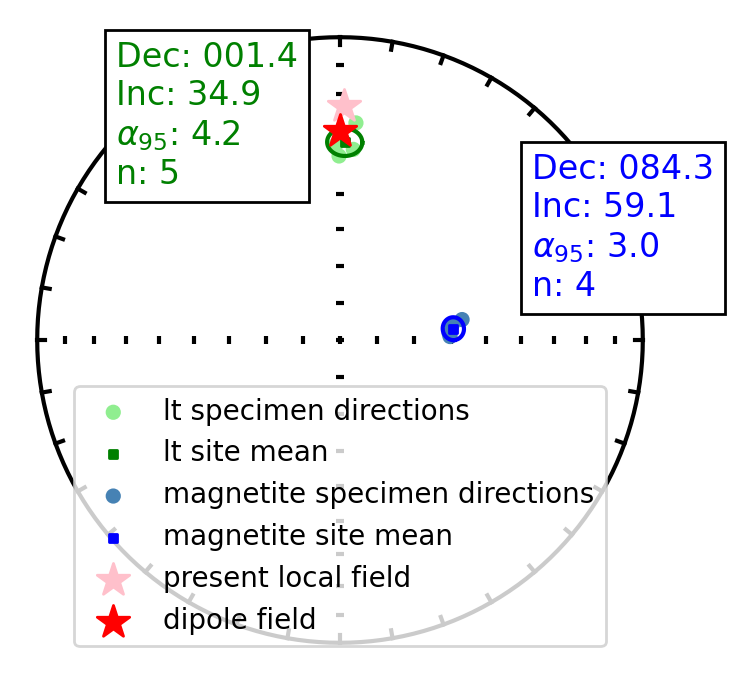

In [23]:
SD_specimen_data_gc["site"] = SD_specimen_data_gc["specimen"].str.split("-").str[0]
SD_specimen_data_gc_SD68 = SD_specimen_data_gc[SD_specimen_data_gc['site'] == 'SD68'].reset_index(drop=True)
SD68_mag = SD_specimen_data_gc_SD68[SD_specimen_data_gc_SD68['dir_comp'] == 'mag'].reset_index(drop=True)
SD68_lt = SD_specimen_data_gc_SD68[SD_specimen_data_gc_SD68['dir_comp'] == 'lt'].reset_index(drop=True)

SD68_mag_mean = ipmag.fisher_mean(SD68_mag['dir_dec'], SD68_mag['dir_inc'])
SD68_lt_mean = ipmag.fisher_mean(SD68_lt['dir_dec'], SD68_lt['dir_inc'])

plt.figure(figsize=(3.5,3.5))
ipmag.plot_net()
ipmag.plot_di(SD68_lt['dir_dec'], 
              SD68_lt['dir_inc'], 
              color='#90EE90', marker='o', label='lt specimen directions',
              markersize=20)
ipmag.plot_di_mean(SD68_lt_mean['dec'], SD68_lt_mean['inc'], SD68_lt_mean['alpha95'], 
                   color='green', marker='s', markersize = 10, label='lt site mean')
ipmag.plot_di(SD68_mag['dir_dec'], 
              SD68_mag['dir_inc'], 
              color='steelblue', marker='o', label='magnetite specimen directions',
              markersize=20)
ipmag.plot_di_mean(SD68_mag_mean['dec'], SD68_mag_mean['inc'], SD68_mag_mean['alpha95'], 
                   color='blue', marker='s', markersize = 10, label='magnetite site mean')
ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='present local field')
ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='dipole field')
plt.legend(loc='lower center')
plt.text(0.8, 0.675, 
         f"Dec: 0{SD68_mag_mean['dec']:.1f}\nInc: {SD68_mag_mean['inc']:.1f}\n$\\alpha_{{95}}$: {SD68_mag_mean['alpha95']:.1f}\nn: {SD68_mag_mean['n']:.0f}", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', 
         bbox=dict(facecolor='white', alpha=1),color='blue')
plt.text(0.15, 0.85, 
         f"Dec: 00{SD68_lt_mean['dec']:.1f}\nInc: {SD68_lt_mean['inc']:.1f}\n$\\alpha_{{95}}$: {SD68_lt_mean['alpha95']:.1f}\nn: {SD68_lt_mean['n']:.0f}", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center',
         bbox=dict(facecolor='white', alpha=1),color='green')
plt.savefig('./output/SD68_data.pdf', dpi=300)
plt.show()

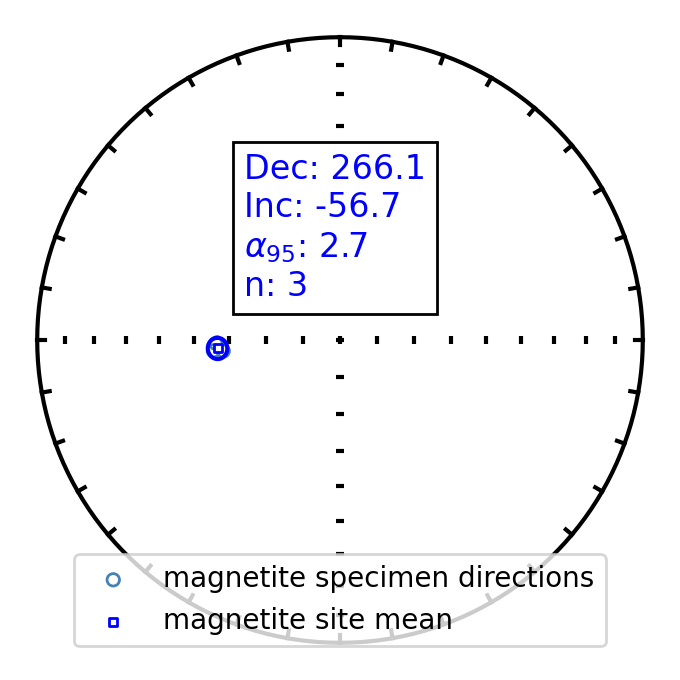

In [24]:
SD_specimen_data_gc_SD56 = SD_specimen_data_gc[SD_specimen_data_gc['site'] == 'SD56'].reset_index(drop=True)
SD56_mag = SD_specimen_data_gc_SD56[SD_specimen_data_gc_SD56['dir_comp'] == 'mag'].reset_index(drop=True)

SD56_mag_mean = ipmag.fisher_mean(SD56_mag['dir_dec'], SD56_mag['dir_inc'])

plt.figure(figsize=(3.5,3.5))
ipmag.plot_net()
ipmag.plot_di(SD56_mag['dir_dec'], 
              SD56_mag['dir_inc'], 
              color='steelblue', marker='o', label='magnetite specimen directions',
              markersize=20)
ipmag.plot_di_mean(SD56_mag_mean['dec'], SD56_mag_mean['inc'], SD56_mag_mean['alpha95'], 
                   color='blue', marker='s', markersize = 10, label='magnetite site mean')
# ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='present local field')
# ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='dipole field')
plt.legend(loc='lower center')
plt.text(0.35, 0.675, 
         f"Dec: {SD56_mag_mean['dec']:.1f}\nInc: {SD56_mag_mean['inc']:.1f}\n$\\alpha_{{95}}$: {SD56_mag_mean['alpha95']:.1f}\nn: {SD56_mag_mean['n']:.0f}", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', 
         bbox=dict(facecolor='white', alpha=1),color='blue')
plt.savefig('./output/SD56_data.pdf', dpi=300)
plt.show()

## Conglomerate test

17 clasts of diabase were sampled from within the diamictite of the Cryogenian Ayn Formation which was deposited unconformable atop the Tonian Shaat dikes. 16 yielded stable interpretable mag components.

The mag component passes a Watson conglomerate test and thus the mt remanence was acquired before the conglomerate of the Ayn Formation was deposited.

In [25]:
# get AynC specimen data
AynC_specimen_data = SD_specimen_data_gc[SD_specimen_data_gc['site'] == 'AynC'].reset_index(drop=True)
AynC_specimen_data_lt = AynC_specimen_data[AynC_specimen_data['dir_comp'] == 'lt'].reset_index(drop=True)
AynC_specimen_mag = AynC_specimen_data[AynC_specimen_data['dir_comp'] == 'mag'].reset_index(drop=True)
AynC_specimen_py = AynC_specimen_data[AynC_specimen_data['dir_comp'] == 'py'].reset_index(drop=True)

AynC_specimen_data_lt_dir_mean = ipmag.fisher_mean(AynC_specimen_data_lt['dir_dec'], AynC_specimen_data_lt['dir_inc'])

### present-local field

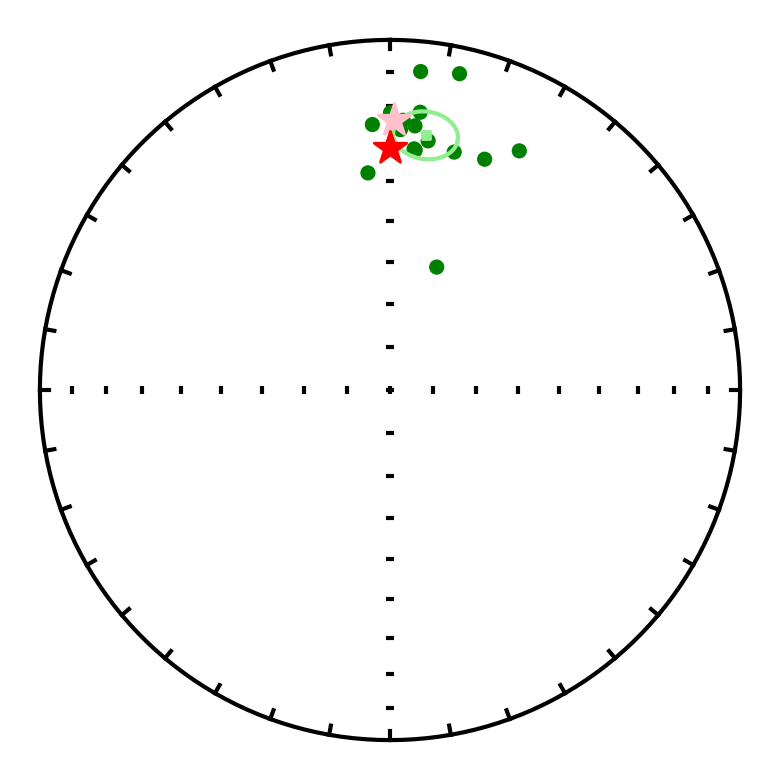

In [26]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(inc=AynC_specimen_data_lt['dir_inc'], dec=AynC_specimen_data_lt['dir_dec'], color='green', marker='o', label='AynC lt component directions')
# plot specimen lt mean direction
ipmag.plot_di_mean(AynC_specimen_data_lt_dir_mean['dec'], AynC_specimen_data_lt_dir_mean['inc'], AynC_specimen_data_lt_dir_mean['alpha95'], 
                   color='lightgreen', marker='s', markersize = 10, label='Shaat dikes present local field direction mean')
# plot Mirbat present local field direction
ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='Mirbat present local field direction')
ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='Mirbat present local field direction')


### magnetite component

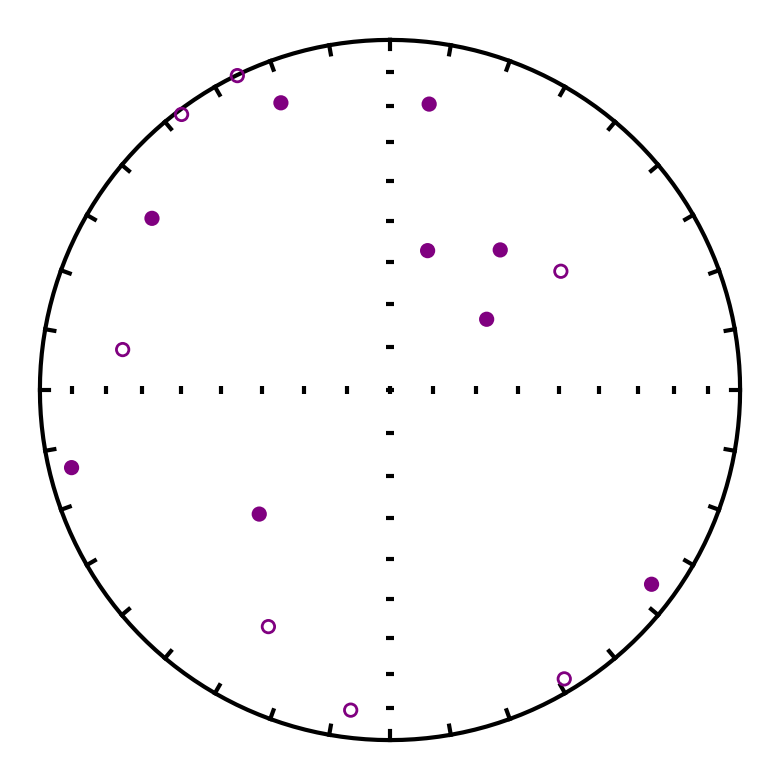

In [27]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(inc=AynC_specimen_mag['dir_inc'], dec=AynC_specimen_mag['dir_dec'], color='purple', marker='o', label='AynC mag component directions')

In [28]:
# do a pmag conglomerate test on the data
ipmag.conglomerate_test_Watson(ipmag.fisher_mean(AynC_specimen_mag['dir_dec'], AynC_specimen_mag['dir_inc'])['r'], len(AynC_specimen_mag['dir_dec']))

R = 3.8923699349091843
Ro_95 = 6.4
Ro_99 = 7.6
This population "passes" a conglomerate test as the null hypothesis of randomness cannot be rejected at the 95% confidence level


{'n': 16, 'R': 3.8923699349091843, 'Ro_95': 6.4, 'Ro_99': 7.6}

## Shaat dike baked contact test with host metamorphic basement

Samples of dike site SD19 are all within 0.5 meters of the margin of the dike which is about 5 meters wide. The S19B samples were collected at variable distances from the dike margin.

| Sample   | Distance from Margin (meters) | Comments                        |
|----------|-------------------------------|---------------------------------|
| S19B-1   | on margin                     | complete dike direction overprint (up to 590ºC)                                |
| S19B-2   | on margin                     | complete dike direction overprint (up to 590ºC) |
| S19B-3   | on margin                     | complete dike direction overprint (up to 590ºC) |
| S19B-4   | on margin                     | complete dike direction overprint (up to 590ºC) |
| S19B-6   | on margin                     | complete dike direction overprint (up to 590ºC) |
| S19B-5   | 0.08                          | complete dike direction overprint (up to 590ºC) |
| S19B-13  | 0.4                           | complete dike direction overprint (up to 590ºC) |
| S19B-14  | 0.6                           | complete dike direction overprint (up to 590ºC) |
| S19B-15  | 0.9                           | complete dike direction overprint (up to 590ºC) |
| S19B-16  | 1.4                           | partial dike overprint heading to distinct direction above 560ºC (dike overprint fit from 500 to 550ºC as 'mt')                               |
| S19B-17  | 1.7                           | partial dike overprint heading to distinct stable end point direction above 560ºC similar to the direction of S19B-22 (dike overprint fit from 500 to 555ºC as 'mt') |
| S19B-20  | 1.8                           | partial dike overprint heading to distinct direction above 560ºC similar to the direction of S19B-22 (dike overprint fit from 500 to 550ºC as 'mt') |
| S19B-21  | 2.2                           | dike overprint unblocks up to ~520ºC |
| S19B-19  | 3.3                           | partial dike overprint poorly resolved up to 340ºC then in distinct direction (dike overprint fit from 280 to 340ºC as 'mt') |
| S19B-18  | 3.6                           | no dike overprint with distinct direction |
| S19B-22  | 4.8                           | distinct direction through magnetite unblocking |
| S19B-7   | 7.5                           | distinct direction with no dike overprint (unblocks above magnetite Curie temperature) |
| S19B-8   | 7.1                           | no data |
| S19B-9   | 8.1                           | distinct direction with no dike overprint (unblocks above magnetite Curie temperature) |
| S19B-10  | 76                            | incomplete data |
| S19B-11  | 76                            | no dike overprint with distinct poorly resolved direction |
| S19B-12  | 76                            | no dike overprint with distinct direction |

That overprints go from complete up to 0.9 m from the dike (out to specimen S19B-15) to nearly complete at 1.4 m (S19B-16) to partial at 1.7 to 3.3 m (S19B-17) to absent at 3.6 m and more away from the dike (S19B-18 and further). These data indicate a positive baked contact test. Specimens at the contact pass Watson and bootstrap common mean tests with the dike direction.

In [29]:
# get SD19 specimen and site data
SD19_specimen_data = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'SD19') & (SD_specimen_data_gc['dir_comp'] == 'mag')].reset_index(drop=True)
SD19_site_data = SD_site_data_gc[SD_site_data_gc['site'] == 'SD19'].reset_index(drop=True)
SD19_specimen_data

,analysts,aniso_f,aniso_l,aniso_p,aniso_s,aniso_s_n_measurements,aniso_t,aniso_type,azimuth,citations,contribution_id,critical_temp,critical_temp_high,critical_temp_low,critical_temp_mineral,critical_temp_type,description,dip,dir_alpha95,dir_comp,dir_dang,dir_dec,dir_inc,dir_mad_free,dir_n_comps,dir_n_measurements,dir_tilt_correction,experiments,hyst_bc,hyst_bc_offset,hyst_bcr,hyst_loop,hyst_mr_mass,hyst_ms_mass,hyst_xhf,igsn,igsn_parent,instrument_codes,int_corr,meas_orient_phi,meas_orient_theta,meas_step_max,meas_step_min,meas_step_unit,meas_temp,method_codes,mineral_type,rem_hirm_mass,rem_sratio,rem_sratio_back,rem_sratio_forward,result_quality,row_id,sample,software_packages,specimen,synthetic_alternatives,volume,weight,site
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mag,0.0,285.5,-72.6,4.4,2.0,10.0,0.0,SD19-1_LP-DIR-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hargrave 2023-05-17 16:28:00,u,NaN,NaN,853.0,773.0,K,NaN,LP-DIR-T:DE-BFL-A:DA-DIR-GEO:SP-SAW,NaN,NaN,NaN,NaN,NaN,g,NaN,SD19-1,pmagpy-4.2.124: demag_gui,SD19-1,NaN,NaN,NaN,SD19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mag,0.0,278.4,-73.6,3.4,2.0,10.0,0.0,SD19-2_LP-DIR-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hargrave 2023-10-06 17:44:50,u,NaN,NaN,853.0,773.0,K,NaN,LP-DIR-T:DE-BFL-A:DA-DIR-GEO:SP-SAW,NaN,NaN,NaN,NaN,NaN,g,NaN,SD19-2,pmagpy-4.2.124: demag_gui,SD19-2,NaN,NaN,NaN,SD19
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mag,0.0,281.8,-59.1,2.6,2.0,12.0,0.0,SD19-3_LP-DIR-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hargrave 2023-05-15 16:51:33,u,NaN,NaN,837.0,633.0,K,NaN,LP-DIR-T:DE-BFL-A:DA-DIR-GEO:SP-SAW,NaN,NaN,NaN,NaN,NaN,g,NaN,SD19-3,pmagpy-4.2.124: demag_gui,SD19-3,NaN,NaN,NaN,SD19
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mag,0.0,264.2,-65.3,2.8,2.0,10.0,0.0,SD19-4_LP-DIR-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hargrave 2023-05-15 16:53:01,u,NaN,NaN,837.0,673.0,K,NaN,LP-DIR-T:DE-BFL-A:DA-DIR-GEO:SP-SAW,NaN,NaN,NaN,NaN,NaN,g,NaN,SD19-4,pmagpy-4.2.124: demag_gui,SD19-4,NaN,NaN,NaN,SD19
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mag,0.0,272.4,-75.4,3.2,2.0,7.0,0.0,SD19-5_LP-DIR-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hargrave 2023-05-15 18:13:38,u,NaN,NaN,837.0,773.0,K,NaN,LP-DIR-T:DE-BFL-A:DA-DIR-GEO:SP-SAW,NaN,NaN,NaN,NaN,NaN,g,NaN,SD19-5,pmagpy-4.2.124: demag_gui,SD19-5,NaN,NaN,NaN,SD19
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mag,0.0,272.9,-62.6,7.0,2.0,12.0,0.0,SD19-6_LP-DIR-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hargrave 2023-05-16 20:50:51,u,NaN,NaN,847.0,673.0,K,NaN,LP-DIR-T:DE-BFL-A:DA-DIR-GEO:SP-SAW,NaN,NaN,NaN,NaN,NaN,g,NaN,SD19-6,pmagpy-4.2.124: demag_gui,SD19-6,NaN,NaN,NaN,SD19


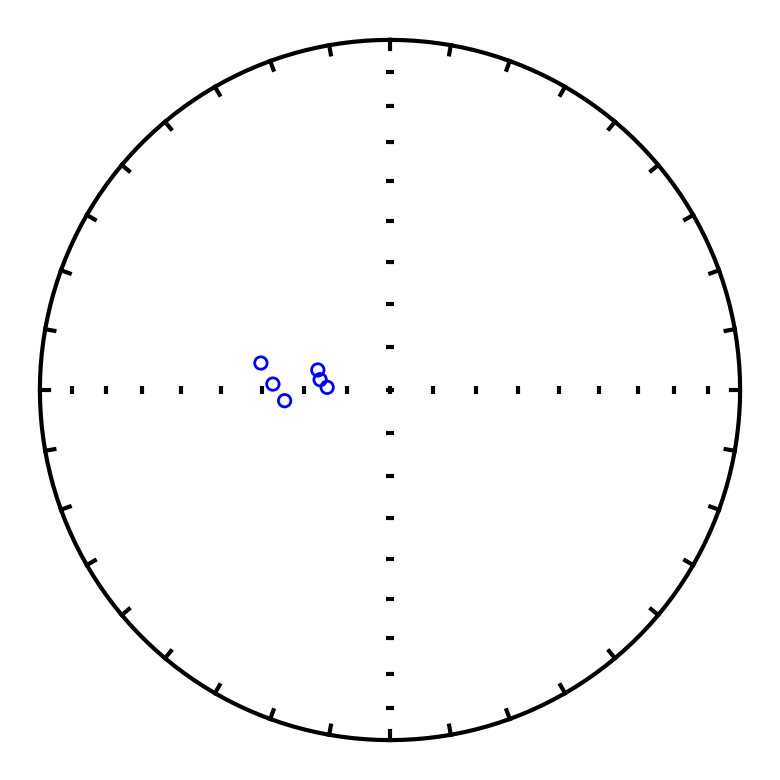

In [30]:
# show SD19 specimen direction
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(inc=SD19_specimen_data['dir_inc'], dec=SD19_specimen_data['dir_dec'], color='blue', marker='o', label='SD19')

In [31]:
## get SD19B baked basement rock data

S19B_specimen_data_mag = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'S19B') & (SD_specimen_data_gc["dir_comp"].isin(["mag"]))].reset_index(drop=True)
S19B_specimen_data_mt = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'S19B') & (SD_specimen_data_gc["dir_comp"].isin(["mag", "mt"]))].reset_index(drop=True)
S19B_specimen_data_ht = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'S19B') & (SD_specimen_data_gc['dir_comp'] == 'hem')].reset_index(drop=True)

# S19B_specimen_data_mt_close = S19B_specimen_data_mt[(S19B_specimen_data_mt['specimen'] != 'S19B-11') & (S19B_specimen_data_mt['specimen'] != 'S19B-12')].reset_index(drop=True)
# S19B_specimen_data_mt_far = S19B_specimen_data_mt[(S19B_specimen_data_mt['specimen'] == 'S19B-11') | (S19B_specimen_data_mt['specimen'] == 'S19B-12')].reset_index(drop=True)

# S19B_specimen_data_mt_far


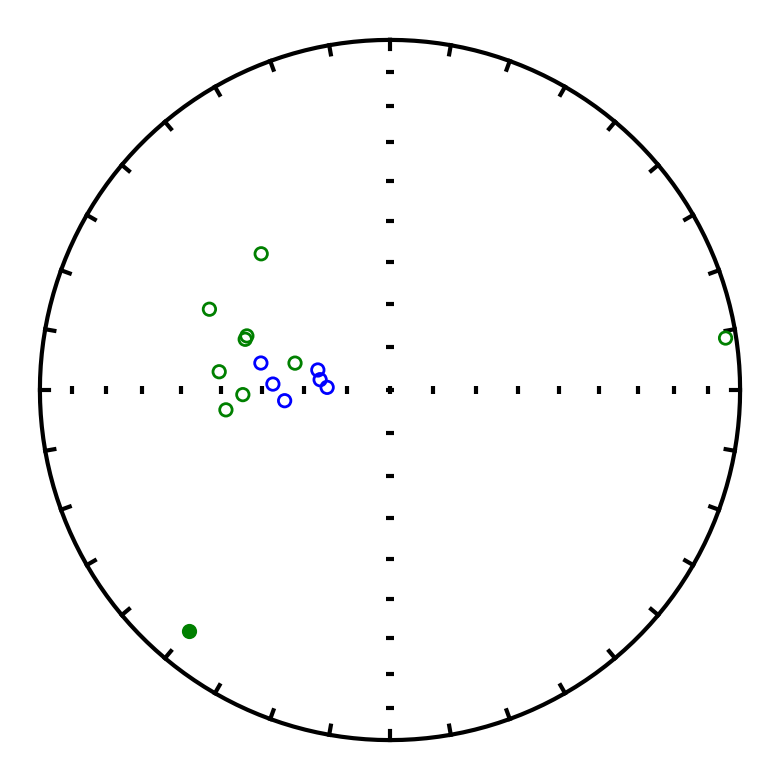

In [32]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
# let's first plot the SD19 directions
ipmag.plot_di(inc=SD19_specimen_data['dir_inc'], dec=SD19_specimen_data['dir_dec'], color='blue', marker='o', label='SD19')

ipmag.plot_di(inc=S19B_specimen_data_mag['dir_inc'], dec=S19B_specimen_data_mag['dir_dec'], color='green', marker='o', label='S19B 0.08m to dike')

# # next let's plot the specimens S19B 7-9 which are 7 meters from the dike; specimens 7 and 9 have hematite remanence, specimen 8 is gone. 
# ipmag.plot_di(inc=S19B_specimen_data_ht['dir_inc'], dec=S19B_specimen_data_ht['dir_dec'], color='orange', marker='o', label='S19B 7m to dike')

# # next let's plot the specimens S19B 10-12 data which are 76 meters from the dike
# ipmag.plot_di(inc=S19B_specimen_data_mt_far['dir_inc'], dec=S19B_specimen_data_mt_far['dir_dec'], color='red', marker='o', label='S19B 76m from dike')

# plt.legend(loc='lower right')
plt.show()

In [33]:
# conduct a common mean test between specimens of SD19 and S19B 1-6
ipmag.common_mean_bootstrap(SD19_specimen_data[['dir_inc','dir_dec']].to_numpy(), 
                            S19B_specimen_data_mt_close[['dir_inc', 'dir_dec']].to_numpy())

NameError: name 'S19B_specimen_data_mt_close' is not defined

In [ ]:
ipmag.common_mean_watson(SD19_specimen_data[['dir_inc','dir_dec']].to_numpy(), 
                            S19B_specimen_data_mt_close[['dir_inc', 'dir_dec']].to_numpy())

Results of Watson V test: 

Watson's V:           5.3
Critical value of V:  7.6
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 11.3
Critical angle for M&M1990:   13.5
The McFadden and McElhinny (1990) classification for
this test is: 'C'


(1, 11.271510837217107, 13.529957106293216, 'C')

In [ ]:
ipmag.common_mean_bayes(SD19_specimen_data[['dir_inc','dir_dec']].to_numpy(), 
                            S19B_specimen_data_mt_close[['dir_inc', 'dir_dec']].to_numpy())

Ambiguous: weak support


(1.8637432303863273, 0.6508066821811056, 'Ambiguous: weak support')

## Field test results summary

The positive reversal text, positive conglomerate test from the AynC clasts, and the result of the baked contact test on the host rocks support that the magnetite remanence component is a primary magnetization.

# Previous Neoproterozoic data

Data developed predominantly from ca. 635 Ma strata in northern Oman were interpreted to constrain a low-latitude position Kilner et al. (2005). These data imply an orientation of Oman similar to present-day (and the Cretaceous), in contrast to the rotated orientation revealed by the ca. 726 Ma pole. This orientation implies an unlikely vertical axis rotation of ~87º from 726 to 635 and back again by 550 Ma to be in position for Gondwana assembly. Moreover, Rowan and Tait (2010) developed additional paleomagnetic that showed the magnetization underlying the Kilner et al. (2005) pole to fail a fold test indicating that it is likely a Cretaceous overprint. 

Kilner et al. paleopole:
> paleopole at 52.38S, 074.48E (N 5 25 sites;a95 5 7.38).

In [34]:
Kilner_plat = -52.38
Kilner_plon = 74.48
Kilner_A95 = 7.3
Kilner_pole_Mirbat_dec, Kilner_pole_Mirbat_inc = pmag.vgp_di(Kilner_plat,Kilner_plon,Mirbat_area_lat,Mirbat_area_lon)
Kilner_dec_difference = Kilner_pole_Mirbat_dec - SD_sites_Leger_all_mag_tc_unified_mean['dec']

print('The difference in declination between the Shaat dikes and Kilner pole is: ' + str(round(Kilner_dec_difference,0)))


The difference in declination between the Shaat dikes and Kilner pole is: 87.0


Sparse paleomagnetic data from 10 specimens of the Cryogenian Ayn Formation developed by \cite{Kempf2000a} near our conglomerate test locality yielded a hematite-held direction with a similar declination to the Shaat dikes. The inclination is substantially shallower indicating a paleolatitude of $\sim$9\textdegree\ (or 10 to 22\textdegree\ if a range of typical inclination shallowing is applied; \citealp{Pierce2022a})

From Kempf et al.
> Two sites (10 samples) revealed a consistent magnetic component above 500³C. The sample mean declination of 68.4º and inclination of 18.4º (k =46.4, K95 =7.2º)

Table 2 reports pole of plon 141.8; plat 23.3; dp 3.9; dm 7.5

In [41]:
Kempf_plat = 23.3
Kempf_plon = 141.8
Kempf_A95 = np.sqrt(3.9*7.5)

Kempf_dec = 68.4
Kempf_inc = 18.4
Kempf_dir_a95 = 7.2

We can verify that the calculation of the pole from the directional data was correctly done:

In [ ]:
pmag.dia_vgp(Kempf_dec, Kempf_inc, Kempf_dir_a95, Mirbat_area_lat, Mirbat_area_lon)

(141.82418524187435, 23.286964222958563, 3.890738281237288, 7.4850939372740655)

In [ ]:
Kempf_inc_0_6 = ipmag.unsquish(incs=Kempf_inc,f=0.6)
Kempf_paleolat = ipmag.lat_from_inc(Kempf_inc)
Kempf_paleolat_0_6 = ipmag.lat_from_inc(Kempf_inc_0_6)
print('The paleolatitude of the Kempf pole is: ' + str(round(Kempf_paleolat,1)))
print('The paleolatitude of the Kempf pole at f=0.6 is: ' + str(round(Kempf_paleolat_0_6,1)))

The paleolatitude of the Kempf pole is: 9.4
The paleolatitude of the Kempf pole at f=0.6 is: 15.5


In [44]:
paleolat_difference = Shaat_all_pole_paleolat-Kempf_paleolat
paleolat_difference_0_6 = Shaat_all_pole_paleolat-Kempf_paleolat_0_6
print('The difference in paleolatitude between the Shaat dikes and Kempf pole (with f=0.6 inclination correction) is: ' + str(round(paleolat_difference_0_6,1)))
print('The difference in paleolatitude between the Shaat dikes and Kempf pole (with no inclination correction) is: ' + str(round(paleolat_difference,1)))

The difference in paleolatitude between the Shaat dikes and Kempf pole (with f=0.6 inclination correction) is: 22.0
The difference in paleolatitude between the Shaat dikes and Kempf pole (with no inclination correction) is: 28.1


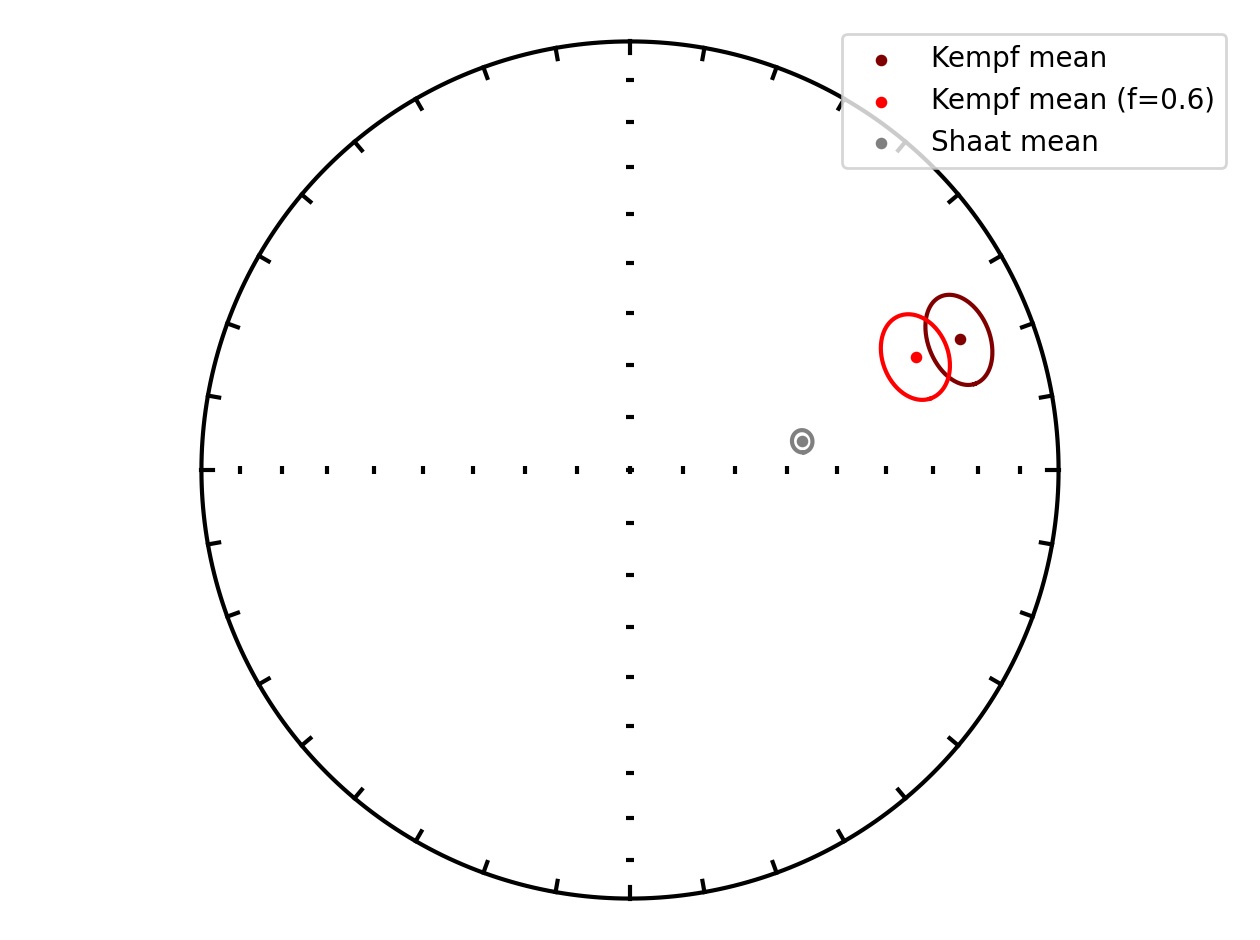

In [38]:
Shaat_mean = SD_sites_Leger_all_mag_tc_unified_mean

ipmag.plot_net()
ipmag.plot_di_mean(Kempf_dec, Kempf_inc, Kempf_a95, color='maroon', marker='o', markersize=10, label='Kempf mean')
ipmag.plot_di_mean(Kempf_dec, Kempf_inc_0_6, Kempf_a95, color='red', marker='o', markersize=10, label='Kempf mean (f=0.6)')

ipmag.plot_di_mean(Shaat_mean['dec'], Shaat_mean['inc'], Shaat_mean['alpha95'], color='grey', marker='o', 
                   markersize=10, label='Shaat mean')
plt.legend()
plt.show()

In [52]:
Kempf_f_0_6_pole = pmag.dia_vgp(Kempf_dec, Kempf_inc_0_6, Kempf_dir_a95, Mirbat_area_lat, Mirbat_area_lon)
print('Plong: ' + str(round(Kempf_f_0_6_pole[0],1)))
print('Plat: ' + str(round(Kempf_f_0_6_pole[1],1)))
print('dp: ' + str(round(Kempf_f_0_6_pole[2],1)))
print('dm: ' + str(round(Kempf_f_0_6_pole[3],1)))
print('approximate A95: ' + str(round(np.sqrt(Kempf_f_0_6_pole[2]*Kempf_f_0_6_pole[3]),1)))

Plong: 135.4
Plat: 24.7
dp: 4.4
dm: 7.9
approximate A95: 5.9


Plon: 136.3  Plat: 24.5
Major axis lon: 41.0  Major axis lat: 11.4
Minor axis lon: 288.0  Minor axis lat: 62.6
Major axis angle of 95% ellipse (Zeta): 9.3
Minor axis angle of 95% ellipse (Eta): 5.4
Number of directions in mean (n): 70000


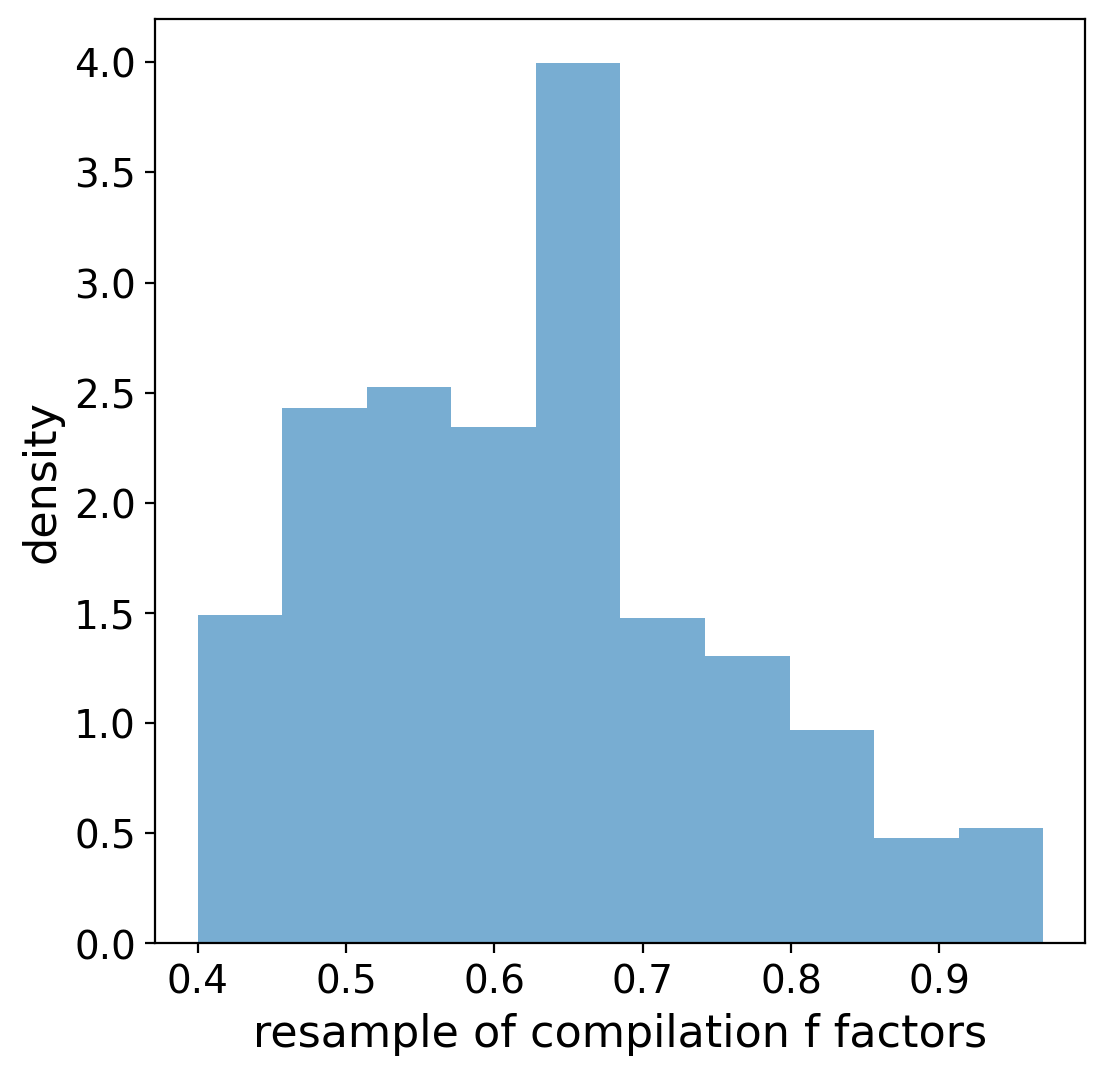

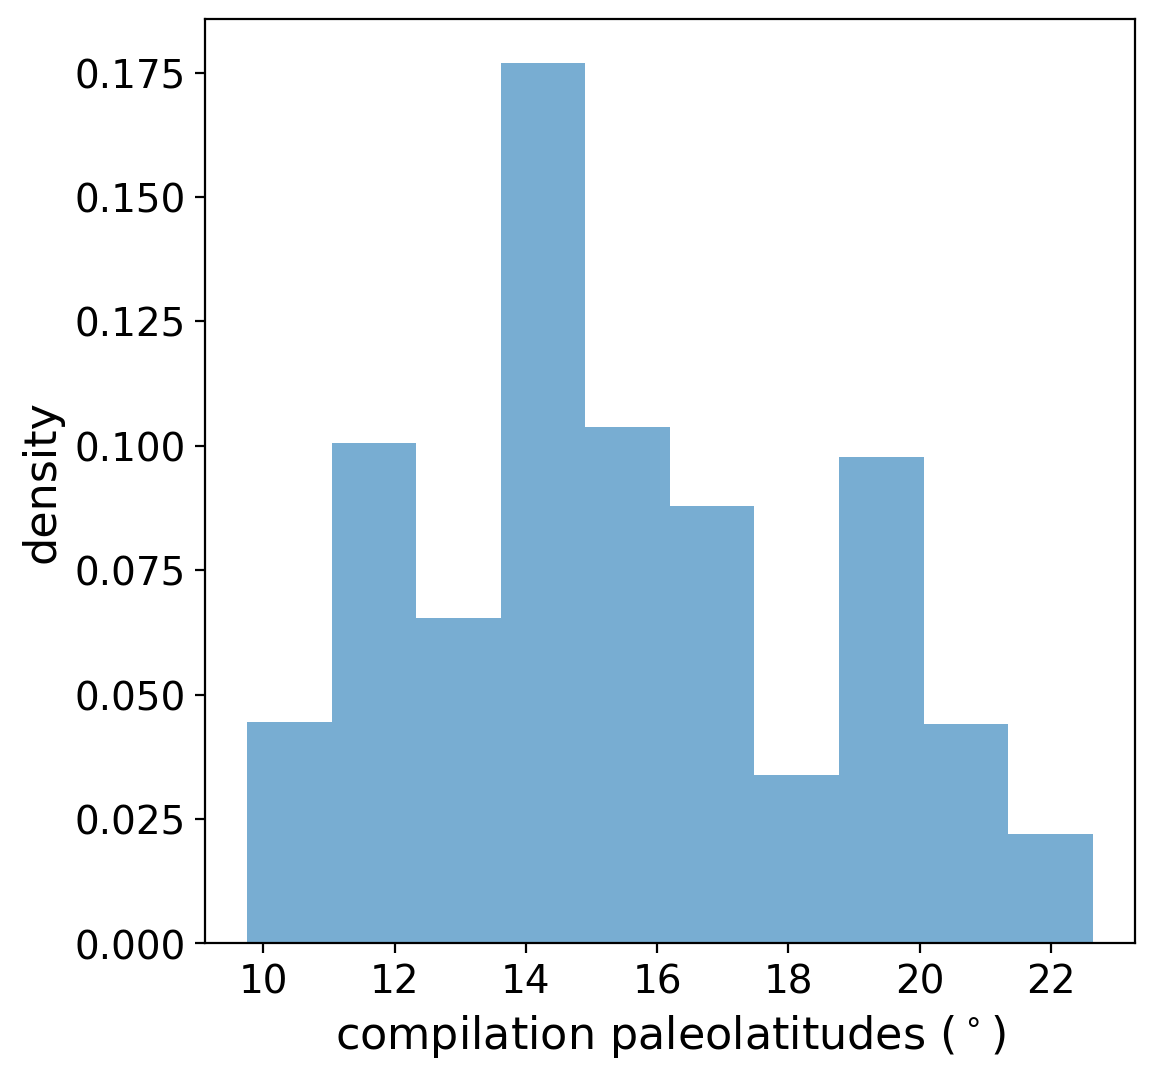

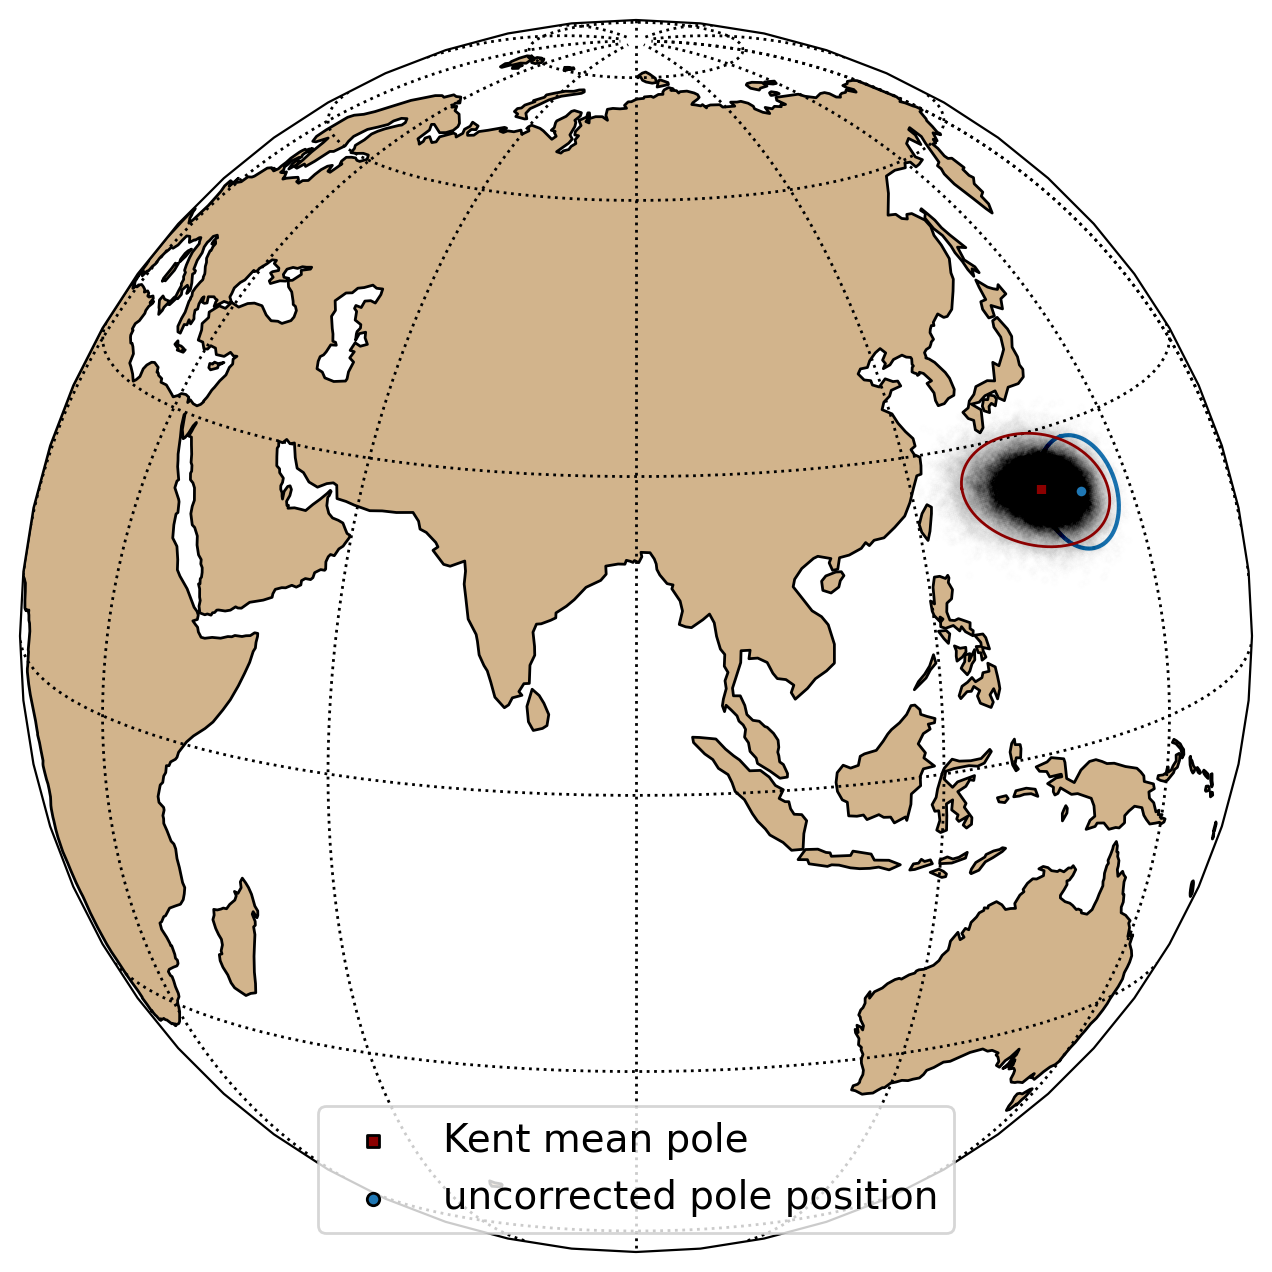

In [39]:
Kempf_pole_kent, paleolatitudes = ipmag.find_compilation_kent(Kempf_plon, Kempf_plat, Kempf_A95, 
                                        Mirbat_area_lon, Mirbat_area_lat,
                                        map_central_longitude=90, map_central_latitude=15
                                        ,n=10000,n_fish=1000,return_poles=False,return_paleolats=True)

In [40]:
np.percentile(paleolatitudes, [2.5, 97.5])

array([10.060591107930794, 21.656910264253373])

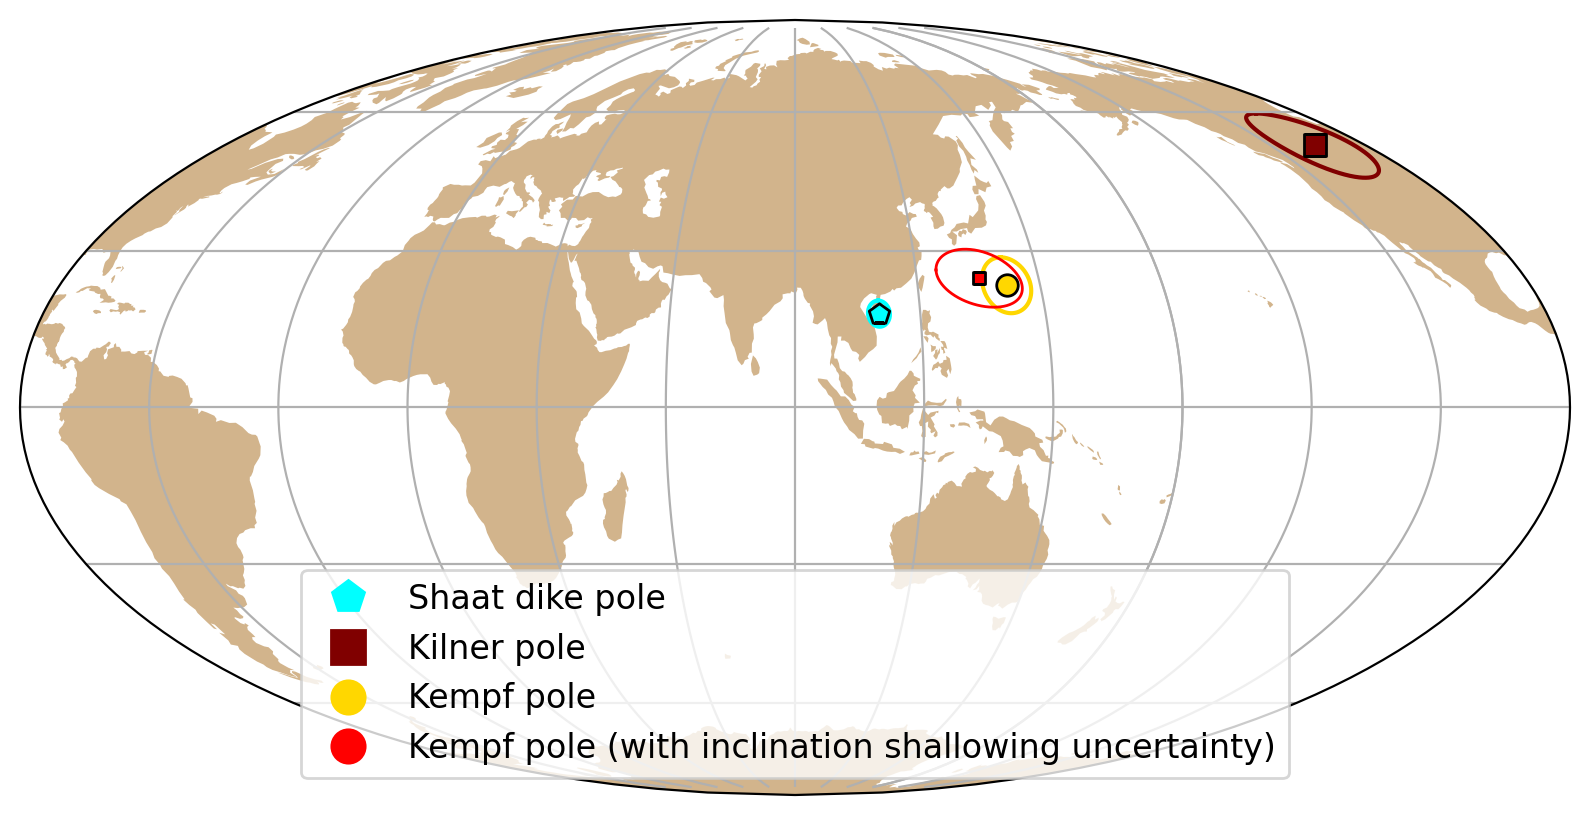

In [ ]:
import matplotlib
import matplotlib.colors as colors

map_axis = ipmag.make_mollweide_map(central_longitude=90,
                                       figsize=(10,10),land_edge_color=None)
ipmag.plot_pole(map_axis, mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc'], mean_Shaat_pole_all['alpha95'], 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon+180, -Kilner_plat, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon, Kempf_plat, Kempf_A95, 
                marker='o',color='gold', markersize=60)
ipmag.plot_pole_ellipse(map_axis,Kempf_pole_kent, color='r')

# Create custom legend elements
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole')
kilner_pole = mlines.Line2D([], [], color='maroon', marker='s', linestyle='None', markersize=12, label='Kilner pole')
kempf_pole = mlines.Line2D([], [], color='gold', marker='o', linestyle='None', markersize=12, label='Kempf pole')
kempf_pole_ellipse = mlines.Line2D([], [], color='r', marker='o', linestyle='None', markersize=12, label='Kempf pole (with inclination shallowing uncertainty)')

# Add the legend to the plot
plt.legend(handles=[mean_pole, kilner_pole, kempf_pole, kempf_pole_ellipse], loc='lower center', fontsize=12)

plt.show()


Need to rotate poles into South Africa coordinates:
37.1 17.2 −8.9

In [ ]:
Gondwana_APWP = pd.read_csv('../data/APWP/Torsvik2012a_Gondwana_APWP.csv')
Gondwana_Cambrian = Gondwana_APWP[(Gondwana_APWP['age'] <= 540) & (Gondwana_APWP['age'] >= 490)]
Gondwana_Cambrian.reset_index(drop=True, inplace=True)
Gondwana_Cambrian

,age,N_poles,RM_A95,RM_Plat,RM_Plon,RM_f0_6_A95,RM_f0_6_Plat,RM_f0_6_Plon,Spline_Plat,Spline_Plon,Spline_GCD
0,490,7.0,4.2,32.8,7.8,13.4,30.8,7.9,34.3,12.9,5.5
1,500,10.0,10.7,25.2,6.5,10.7,25.2,6.5,30.7,10.7,6.7
2,510,9.0,7.8,16.9,4.4,7.9,17.0,4.2,19.9,4.0,2.9
3,520,11.0,9.2,13.6,357.8,9.4,13.8,357.1,9.3,351.0,7.5
4,530,7.0,13.5,7.7,347.0,13.8,8.5,344.7,4.2,339.8,6.5
5,540,4.0,30.9,-6.9,332.1,32.4,-3.9,326.8,-1.3,328.6,3.2


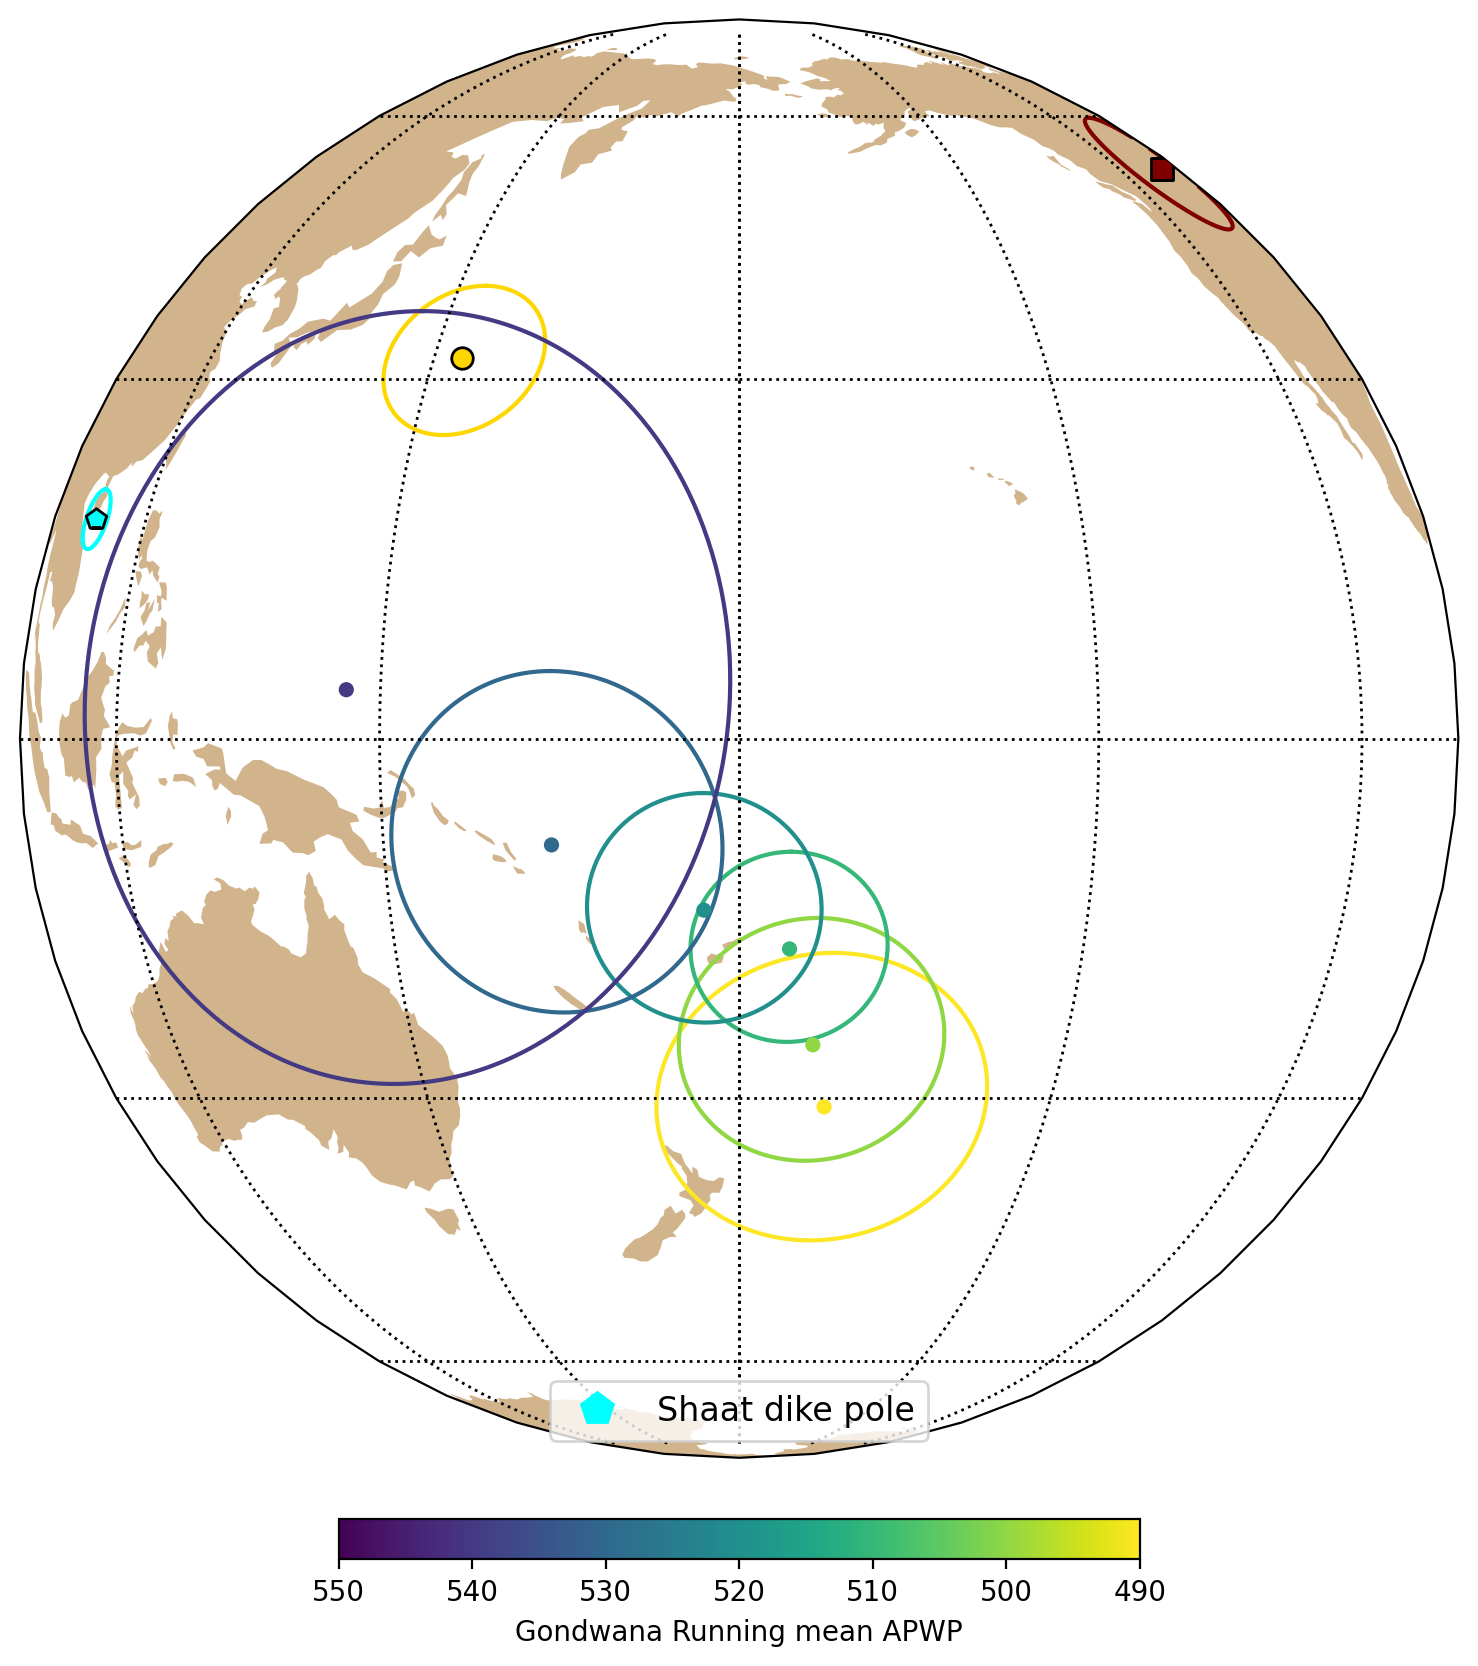

In [ ]:
map_axis = ipmag.make_orthographic_map(central_longitude=180,
                                       figsize=(10,10),land_edge_color=None)
ipmag.plot_pole(map_axis, mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc'], mean_Shaat_pole_all['alpha95'], 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon+180, -Kilner_plat, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon, Kempf_plat, Kempf_A95, 
                marker='o',color='gold', markersize=60)

vmin=490
vmax=550
cNorm = colors.Normalize(vmin, vmax)
Gondwana_scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

for n in range(Gondwana_Cambrian.shape[0]):
    rgba = Gondwana_scalarMap.to_rgba(Gondwana_Cambrian['age'][n])
    hex_color = colors.rgb2hex(rgba)
    ipmag.plot_pole(map_axis,Gondwana_Cambrian['RM_f0_6_Plon'][n]+180,
                    -Gondwana_Cambrian['RM_f0_6_Plat'][n],
                    Gondwana_Cambrian['RM_f0_6_A95'][n],
                    color=hex_color, markersize=30, edgecolor='none')
    

mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole')

# Add the legend to the plot
plt.legend(handles=[mean_pole], loc='lower center', fontsize=12)
cbar=plt.colorbar(Gondwana_scalarMap, orientation='horizontal', fraction=0.026, pad=0.04)
cbar.set_label('Gondwana Running mean APWP')
cbar.ax.invert_xaxis()

plt.show()

### Nantuo pole

the published Nantuo pole of _9.3 165.9_ does not incorporate inclination shallowing. The pole can be adjusted to implement f=0.6 using this code (recognizing that there is uncertainty associated with the actual f-factor that should lead to elongation between the unflattened pole and such a flattened pole)

In [ ]:
site_lat = 28.5
site_lon = 109.8

pole_lat = 9.3
pole_lon = 165.9

di = pmag.vgp_di(pole_lat,pole_lon,site_lat,site_lon)
dec = di[0]
inc = di[1]

inc_0_6 = ipmag.unsquish(inc,0.6)

pole_corrected = pmag.dia_vgp(dec, inc_0_6, 1, site_lat, site_lon)
pole_lon_corrected = pole_corrected[0]
pole_lat_corrected = pole_corrected[1]
print(pole_lon_corrected,pole_lat_corrected)